In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import curve_fit
import random
import fista
import timeit
from itertools import combinations
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

# 1. Preliminaries

## Load basis functions

In [2]:
'''Load a dictionary of 300 basis functions, each with
dimensions of 16 x 16 pixels.  (~1.2 times overcomplete)'''

bases = np.load('basis1.npz')['basis']
pixels = 16

## Display 100 basis functions

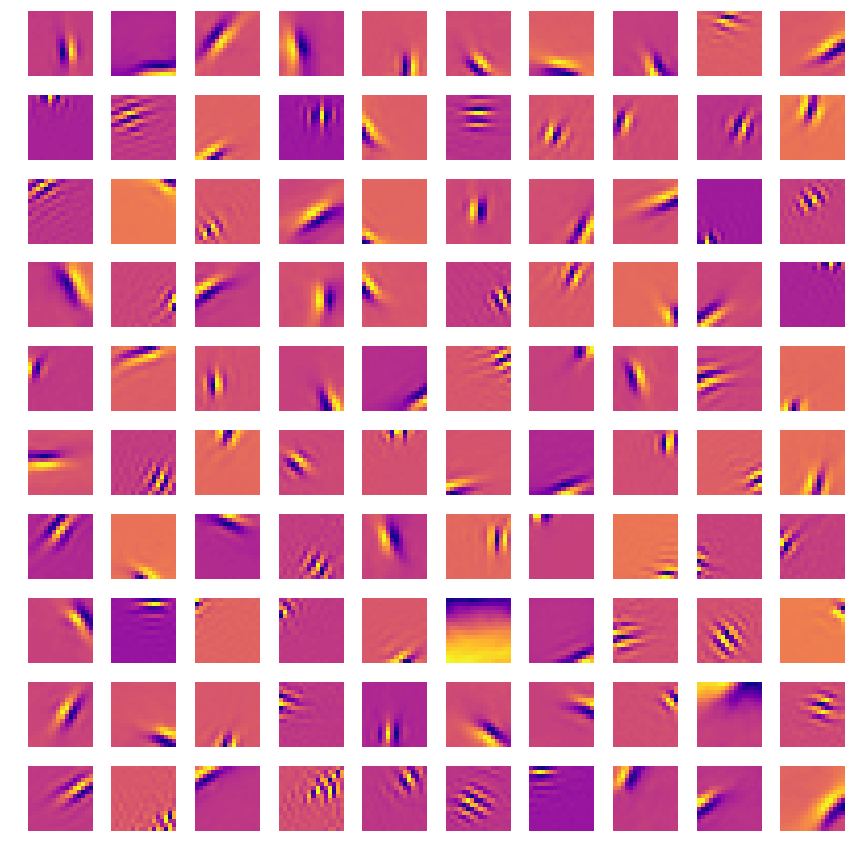

In [3]:
fig, axes = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize = (12,12), facecolor = 'white')
axes = axes.ravel()

for i in range(100):      
    axes[i].imshow(np.reshape(bases[:,i], (pixels, pixels)), cmap = 'plasma')
    axes[i].axis('off')
    
plt.tight_layout(h_pad = 1, w_pad = 1)
plt.show()

In [66]:
def gabor(q, A, x0, y0, phi, psi, sigma_x, sigma_y,k):
    x = q[0]
    y = q[1]
    xt = np.cos(phi)*(x - x0) - np.sin(phi)*(y - y0)
    yt = np.sin(phi)*(x - x0) + np.cos(phi)*(y - y0)    
    return A*np.exp((-(xt/sigma_x)**2 -(yt/sigma_y)**2)/2)*np.cos(k*yt + psi)


xy = np.mgrid[-0.8:0.8:0.1, -0.8:0.8:0.1].reshape(2,-1).T


gabor_fits = np.zeros((300, 8))
energies = []
bad_fits = []

for i in range(300):
    wave = np.asarray(wave)
    try:
        popt, pcov = curve_fit(gabor,xy.T, bases[:,i], p0 = (1,0,0,0,0,1,1,10), bounds = ([-1,-1,-1,-3,-3,0,0,0], [1,1,1,3.15,3.15,5,5,30]))
        
        wave = []
        for q in xy:
            wave.append(gabor(q , popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6],popt[7]))
        energy = np.sum((bases[:,i] - wave)**2)
        energies.append(energy)
        if energy > 0.15:
            bad_fits.append(i)
        else:
            gabor_fits[i,:] = popt
        #plt.imshow(np.reshape(wave, (pixels, pixels)), cmap = 'plasma')
        #plt.show()

        #plt.imshow(np.reshape(bases[:,i], (pixels, pixels)), cmap = 'plasma')
        #plt.show()
    
    except RuntimeError:
        print('failed fit')
        bad_fits.append(i)
    
print(len(energies))

"""wave = []
popt = gabor_fits[8]
for q in xy:
    wave.append(gabor(q , popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6],popt[7]))

#plt.plot(wave)
#plt.plot(bases[:,5])
plt.show()
plt.imshow(np.reshape(wave, (pixels, pixels)), cmap = 'plasma')
plt.show()

plt.imshow(np.reshape(bases[:,8], (pixels, pixels)), cmap = 'plasma')
plt.show()

print(np.sum((bases[:,8] - wave)**2))"""



failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
failed fit
285


"wave = []\npopt = gabor_fits[8]\nfor q in xy:\n    wave.append(gabor(q , popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6],popt[7]))\n\n#plt.plot(wave)\n#plt.plot(bases[:,5])\nplt.show()\nplt.imshow(np.reshape(wave, (pixels, pixels)), cmap = 'plasma')\nplt.show()\n\nplt.imshow(np.reshape(bases[:,8], (pixels, pixels)), cmap = 'plasma')\nplt.show()\n\nprint(np.sum((bases[:,8] - wave)**2))"

0


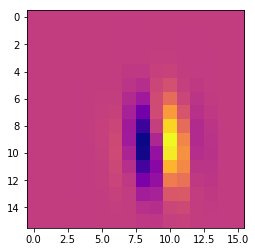

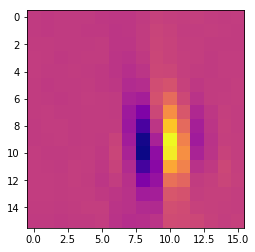

2


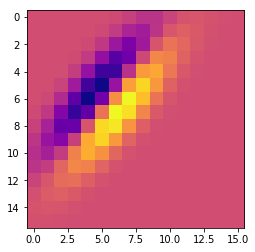

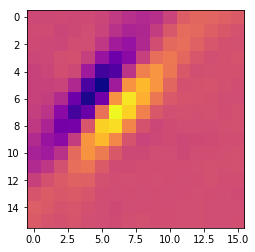

5


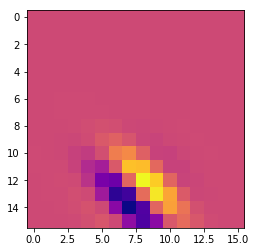

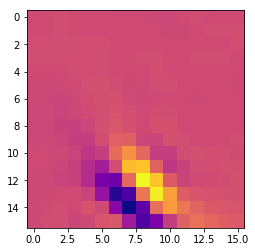

7


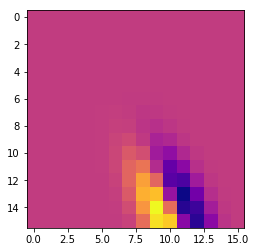

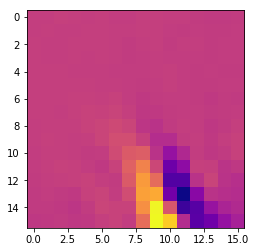

9


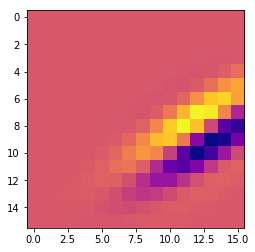

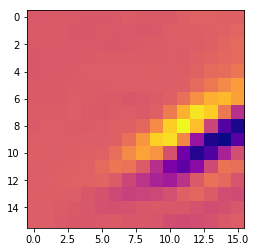

11


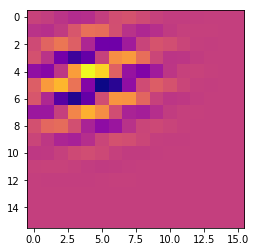

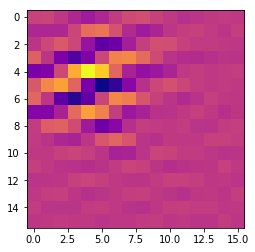

12


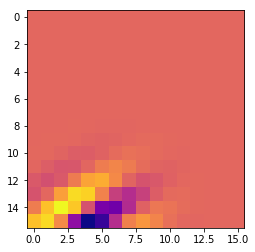

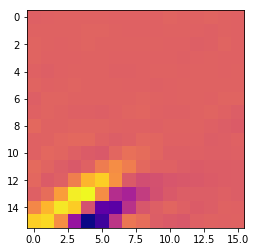

13


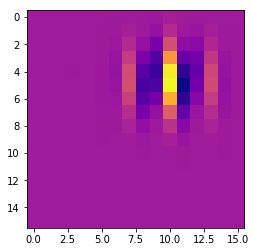

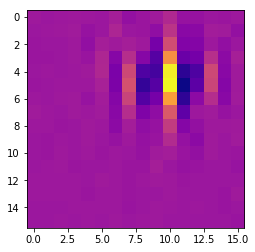

16


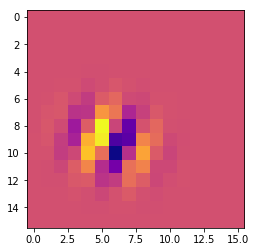

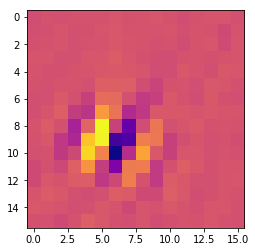

18


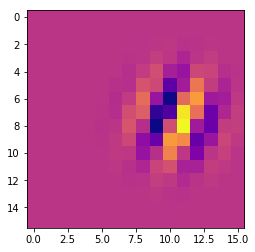

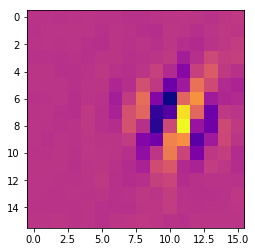

19


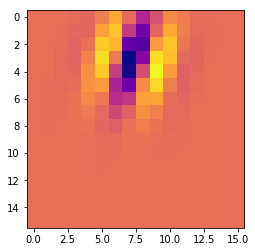

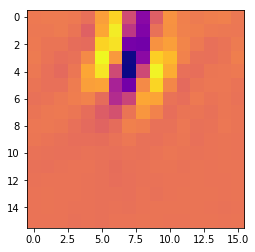

23


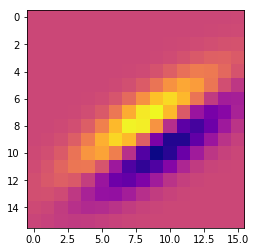

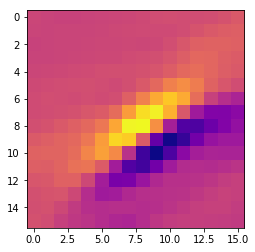

25


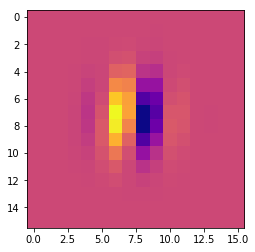

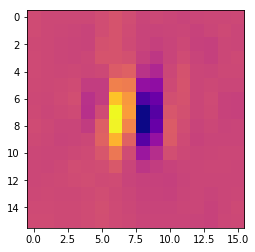

29


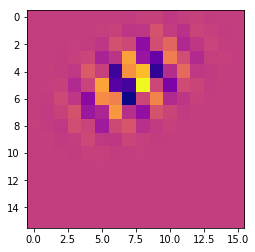

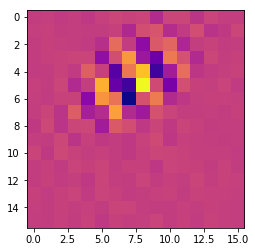

33


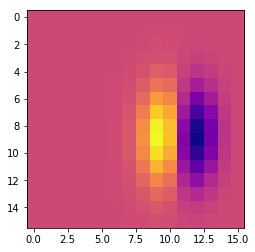

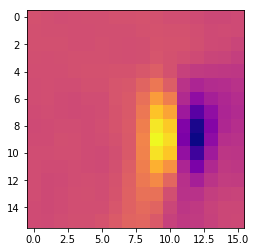

38


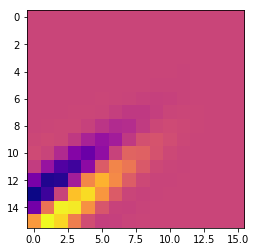

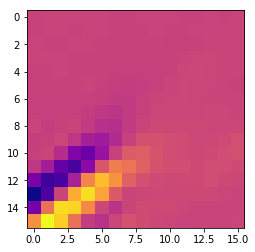

39


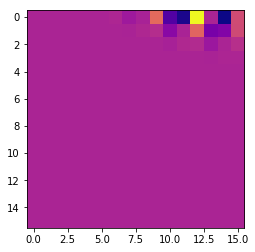

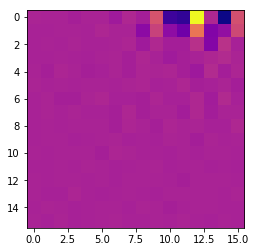

41


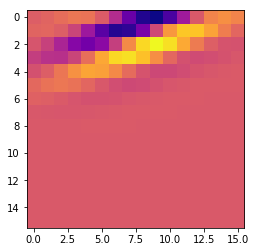

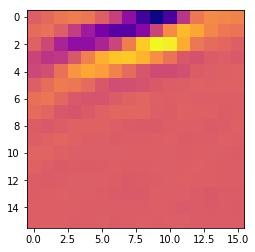

47


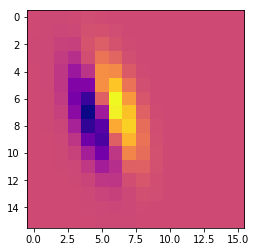

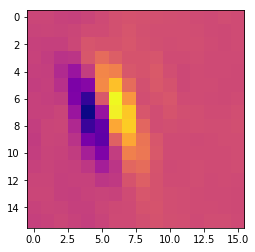

49


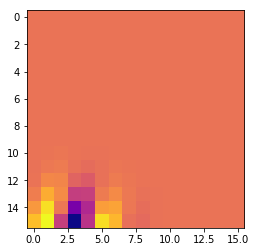

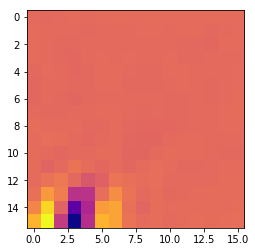

53


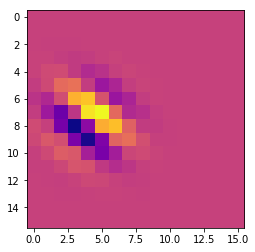

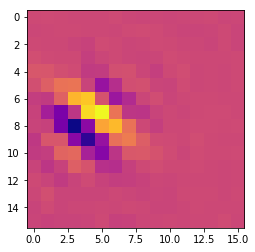

55


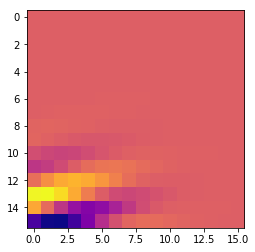

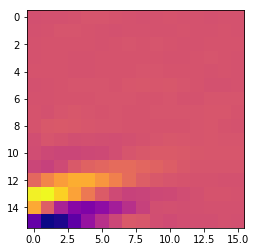

59


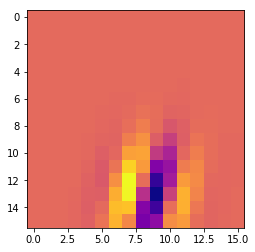

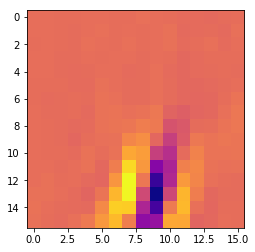

60


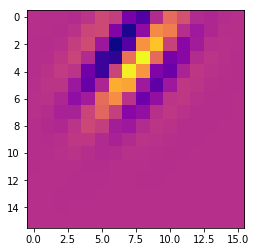

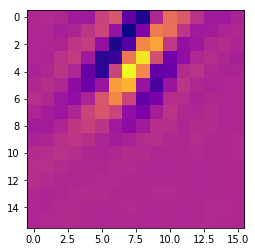

61


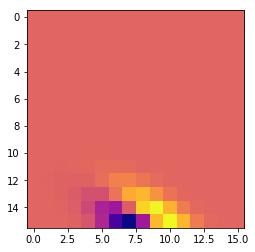

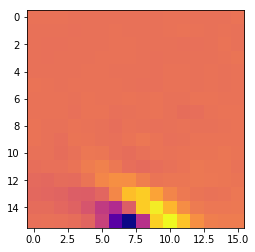

62


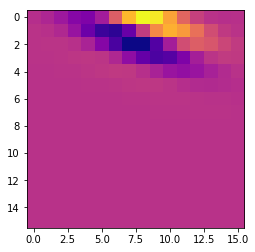

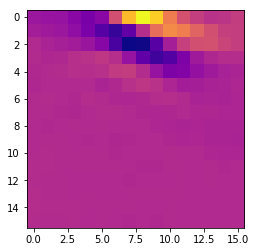

63


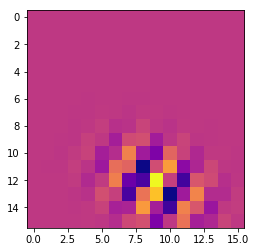

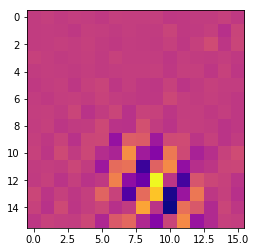

64


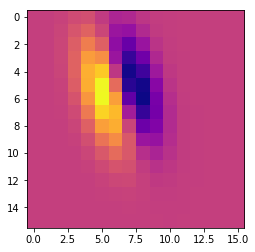

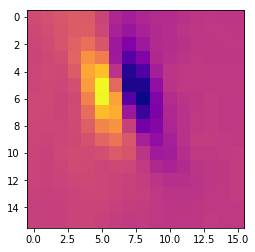

65


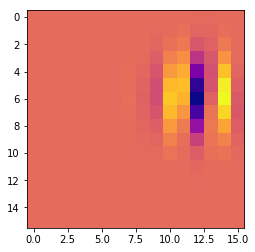

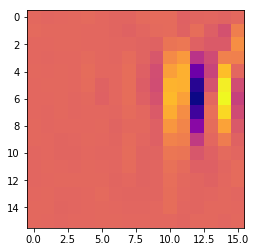

66


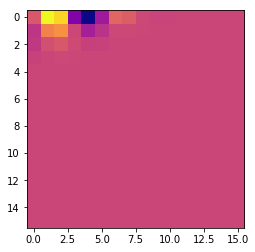

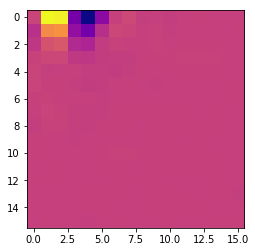

67


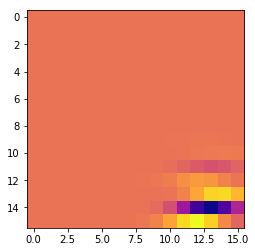

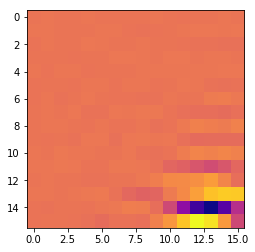

70


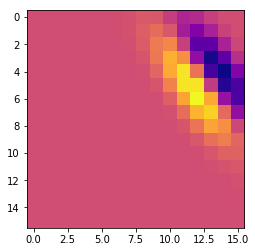

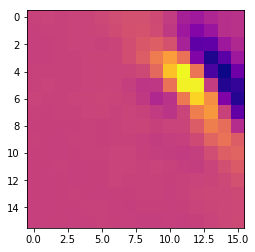

74


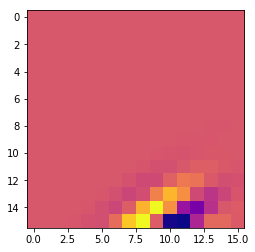

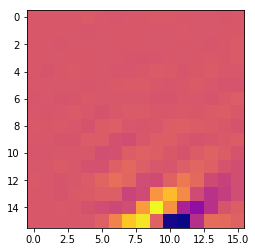

78


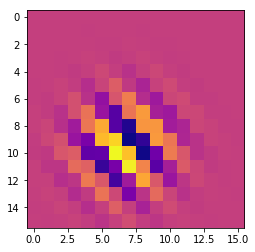

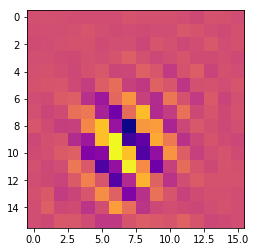

79


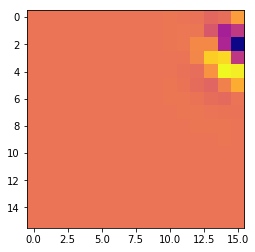

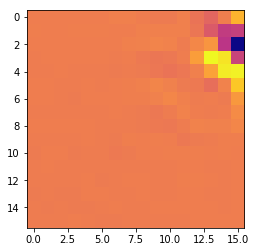

80


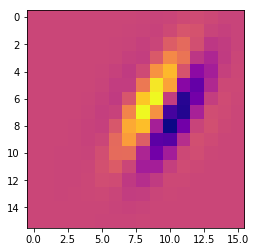

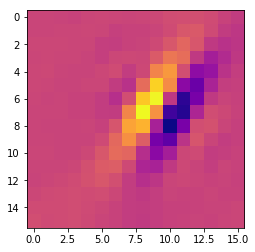

81


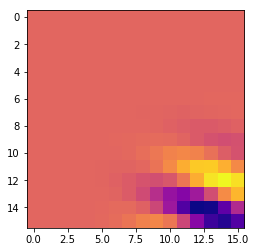

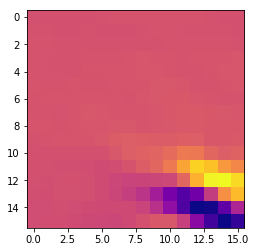

82


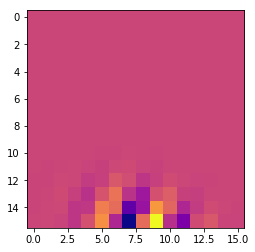

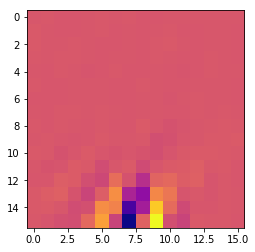

84


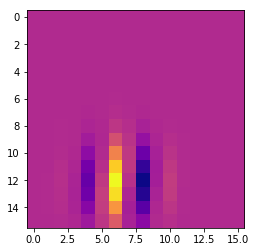

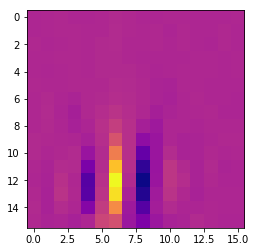

85


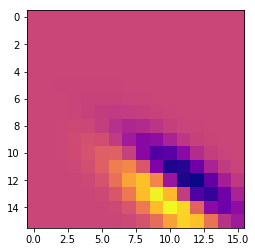

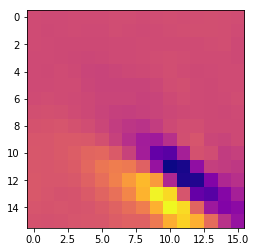

86


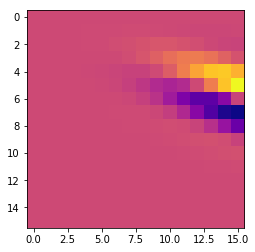

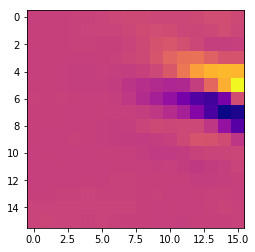

88


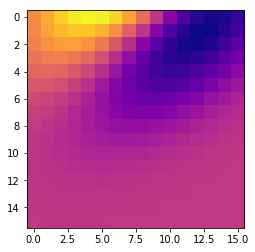

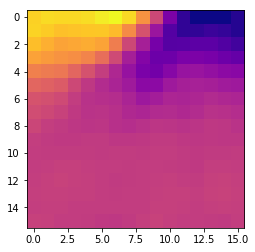

90


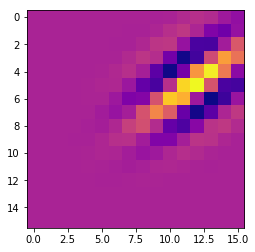

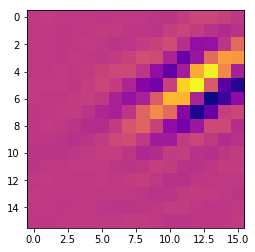

92


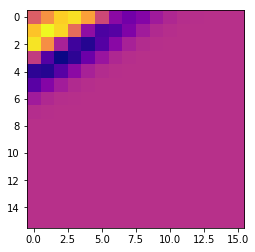

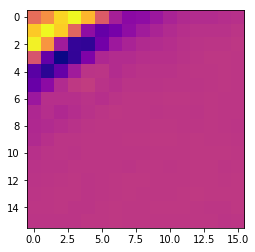

99


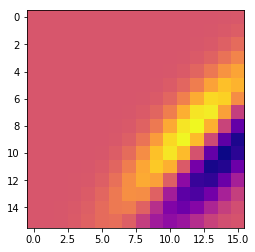

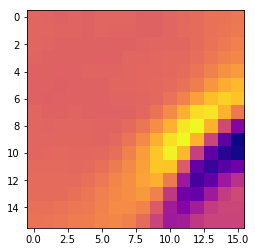

103


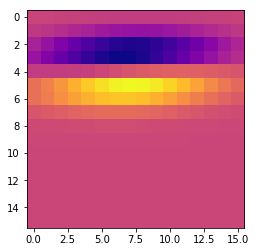

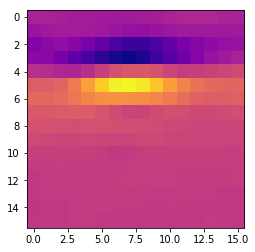

106


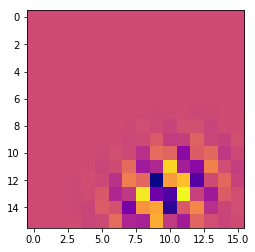

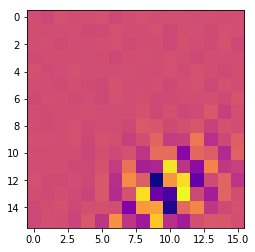

108


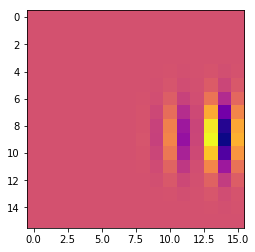

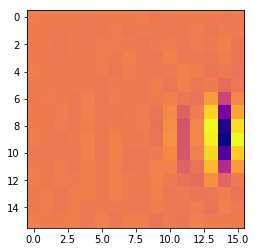

109


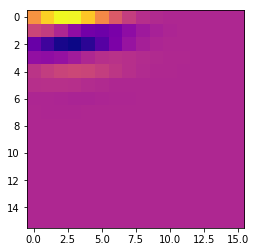

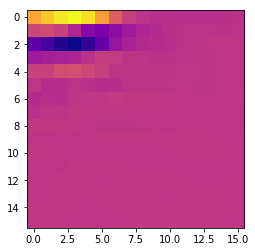

110


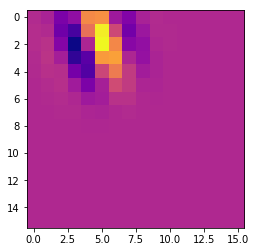

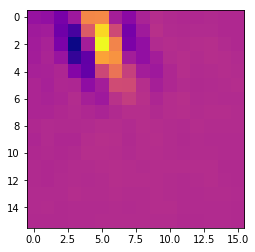

114


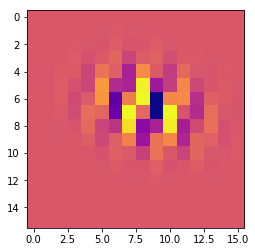

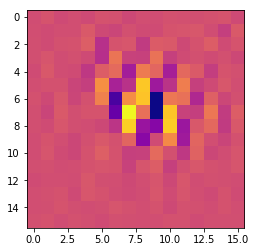

116


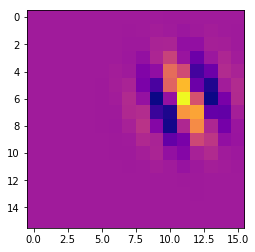

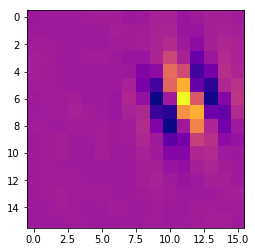

118


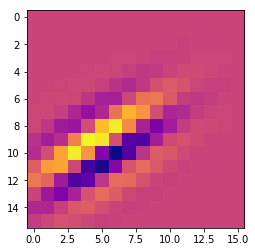

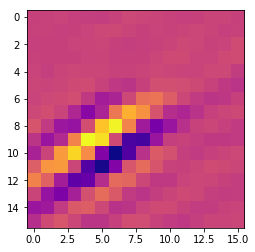

119


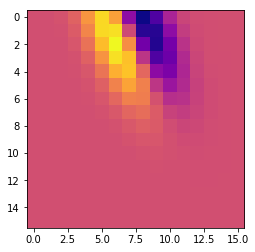

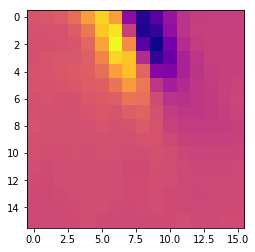

120


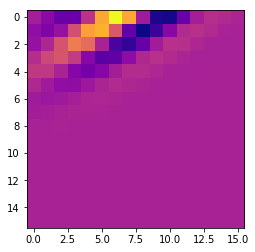

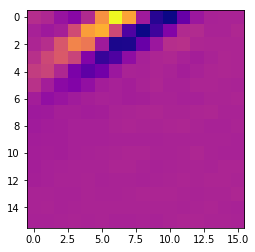

122


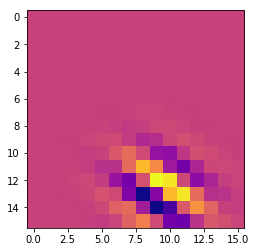

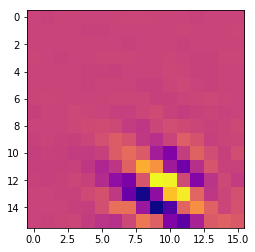

123


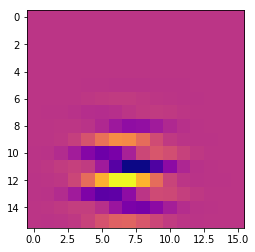

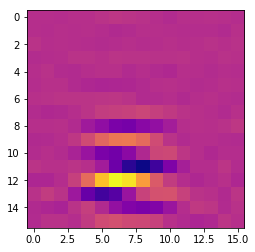

124


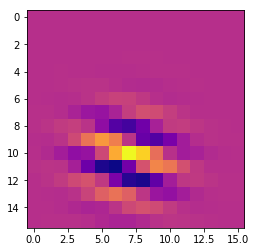

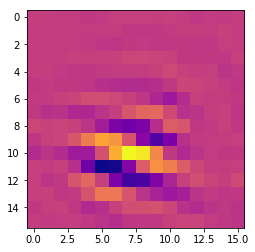

125


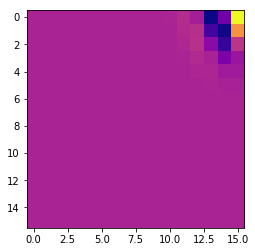

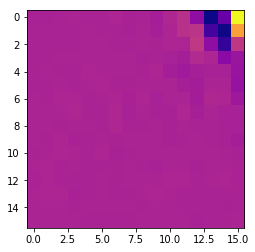

129


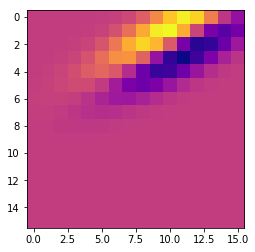

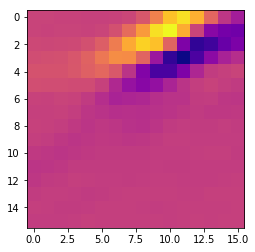

130


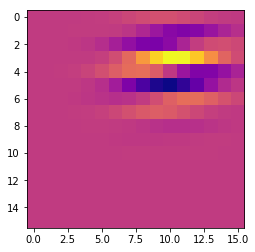

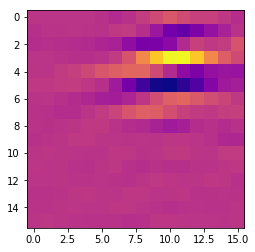

131


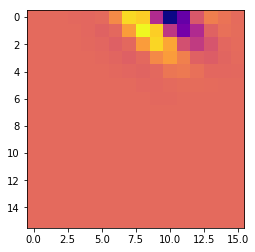

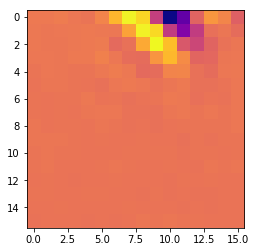

132


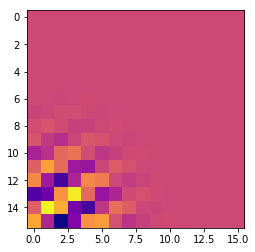

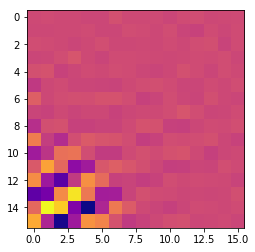

133


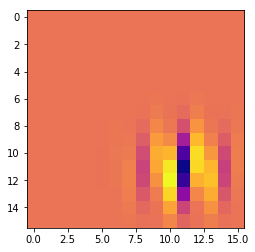

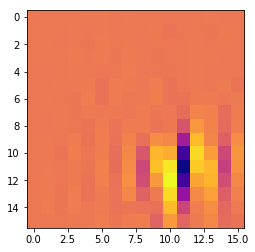

135


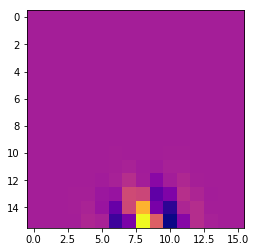

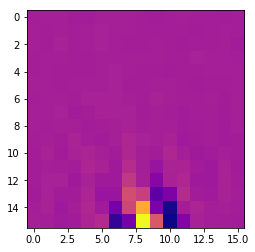

139


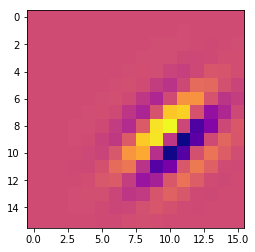

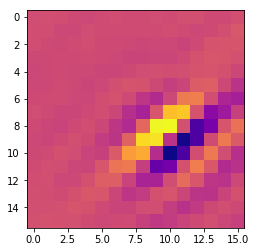

140


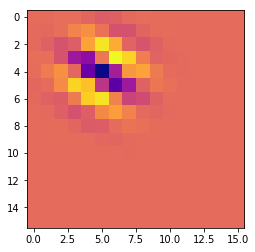

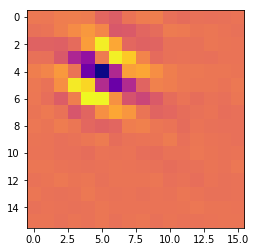

142


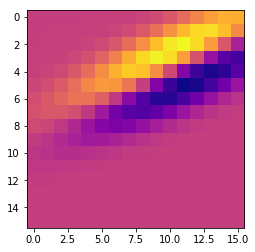

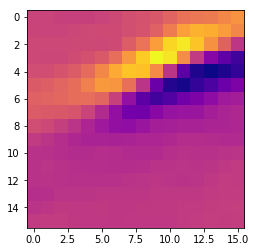

145


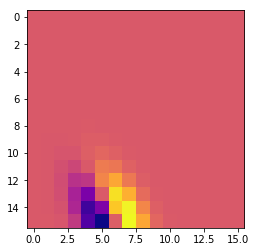

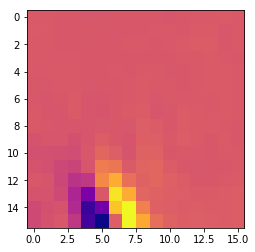

146


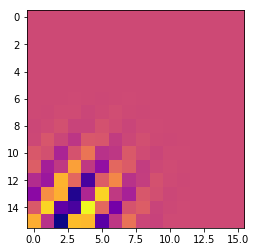

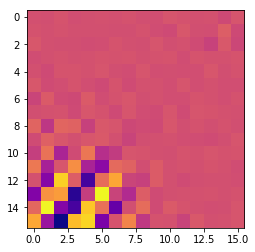

147


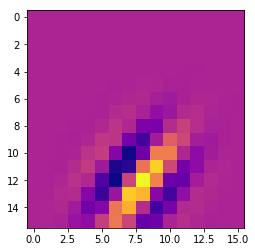

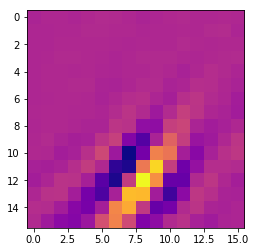

151


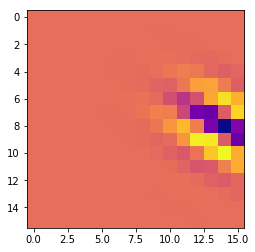

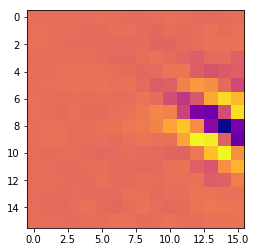

153


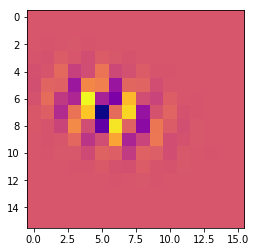

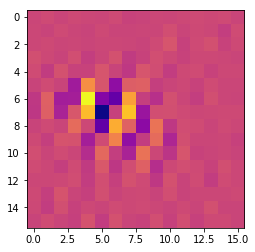

155


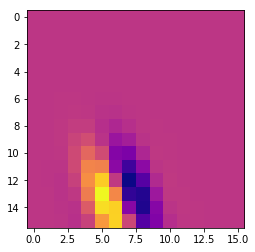

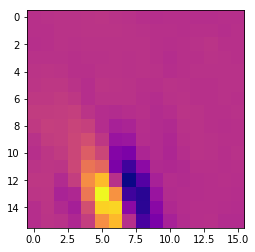

156


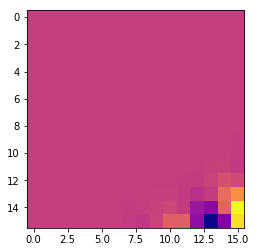

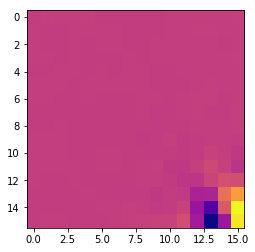

158


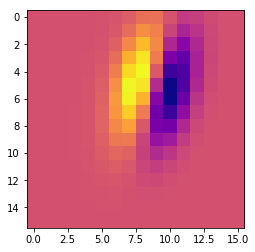

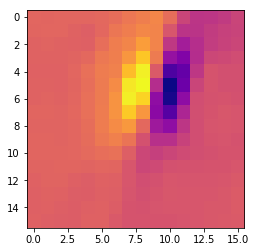

164


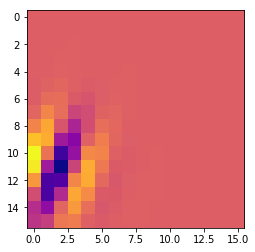

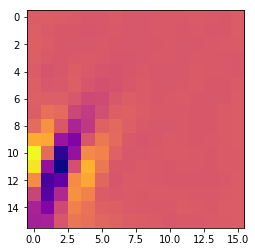

165


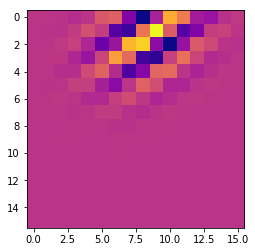

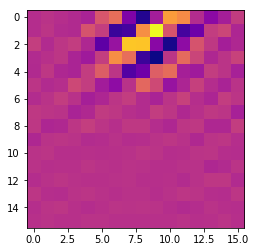

166


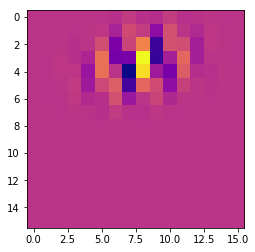

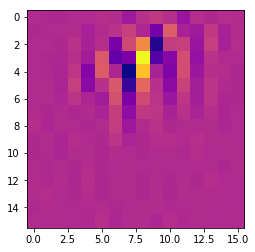

170


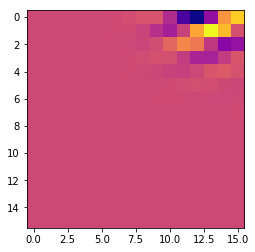

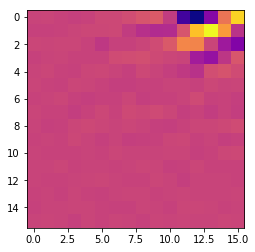

171


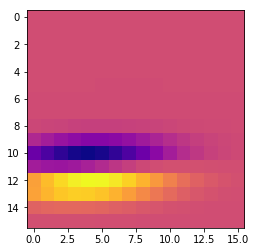

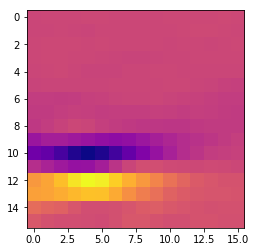

173


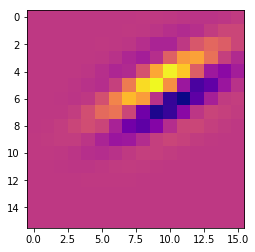

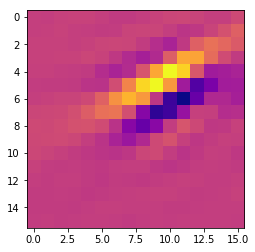

179


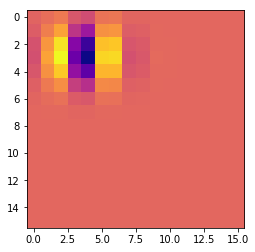

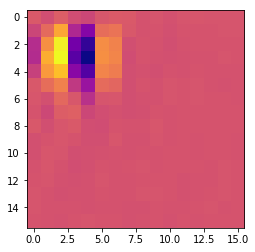

181


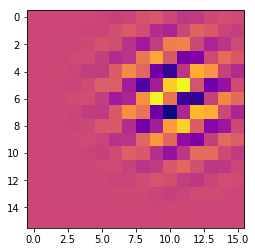

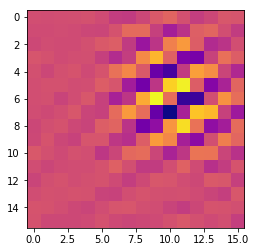

185


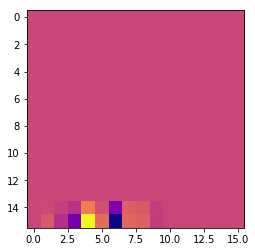

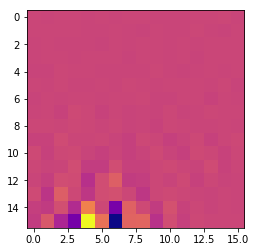

189


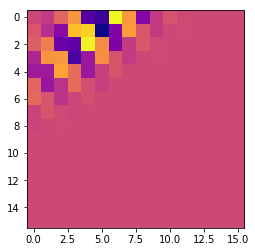

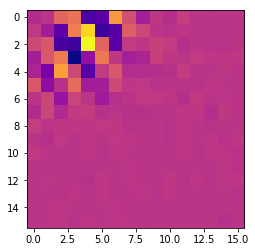

190


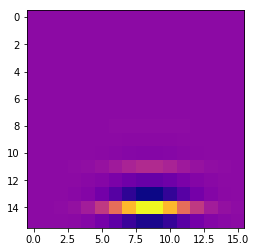

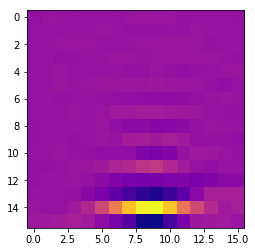

199


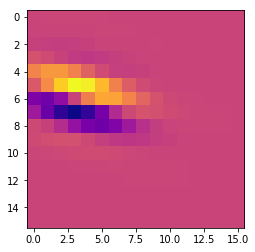

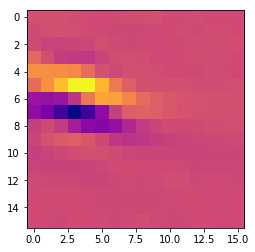

202


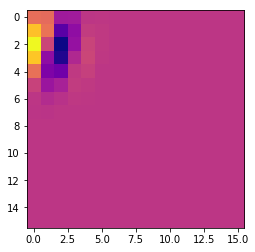

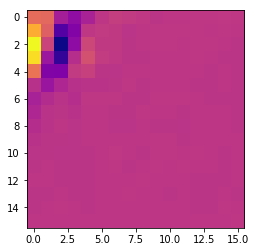

203


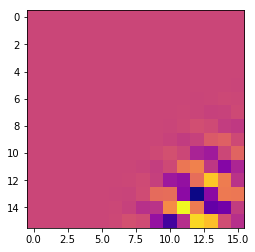

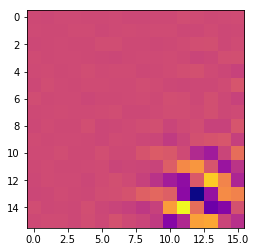

205


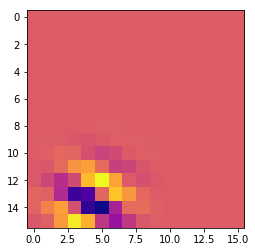

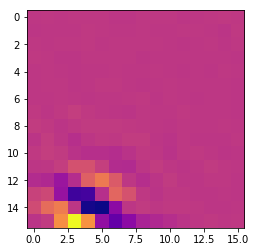

209


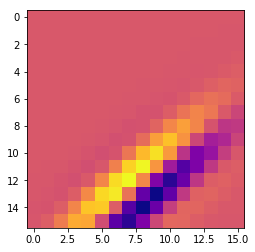

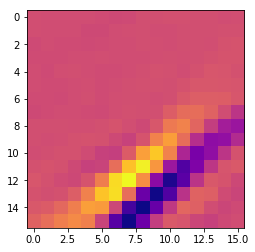

213


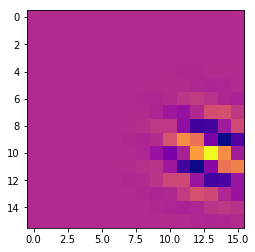

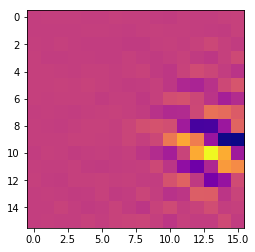

216


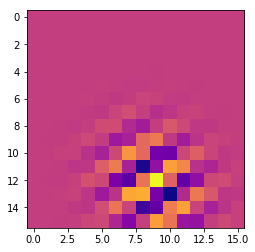

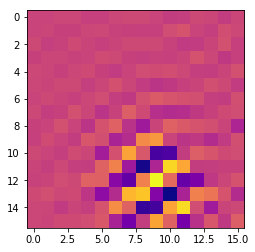

218


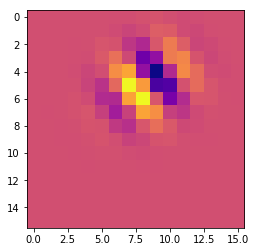

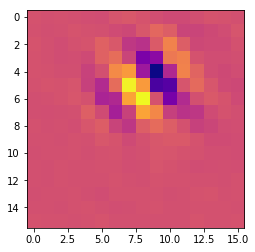

219


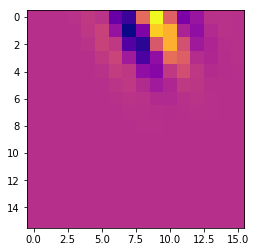

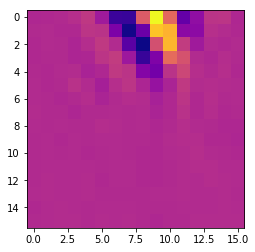

220


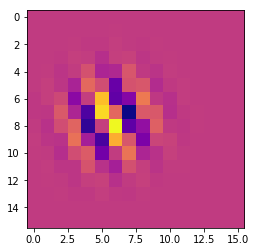

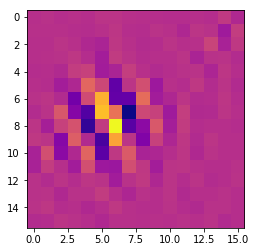

222


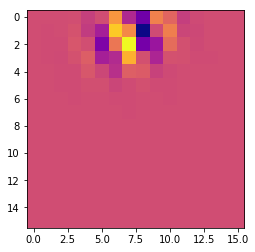

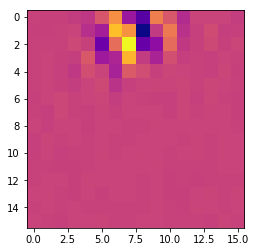

223


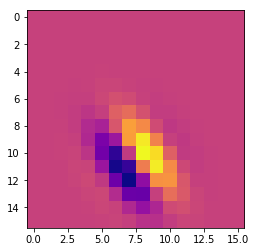

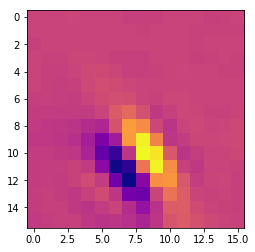

232


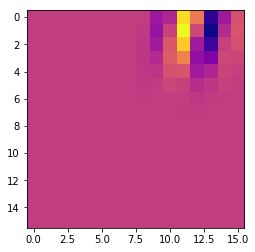

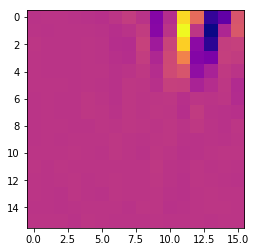

233


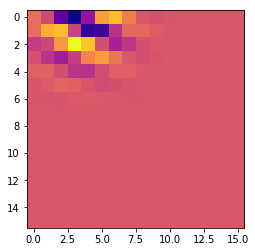

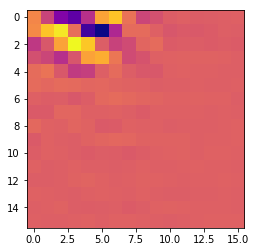

235


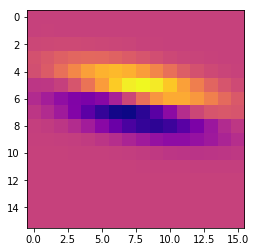

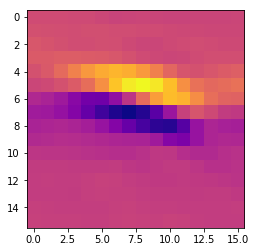

236


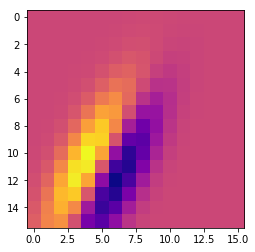

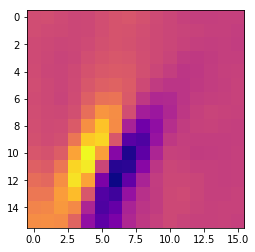

237


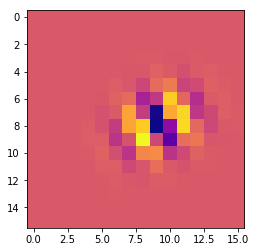

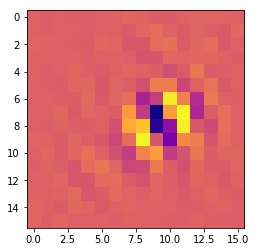

240


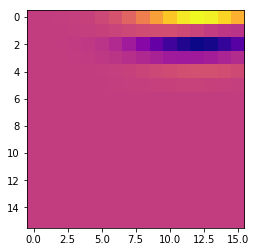

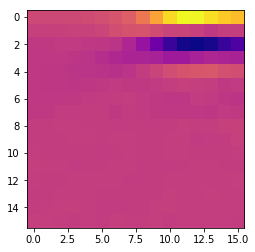

242


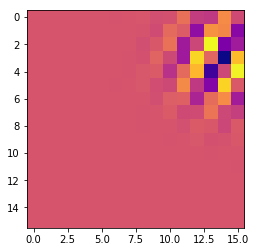

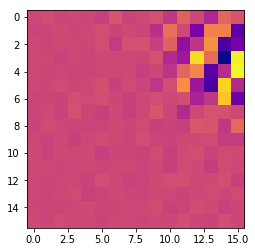

244


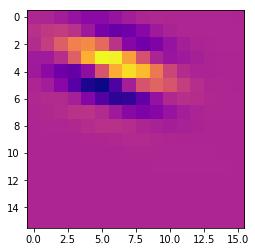

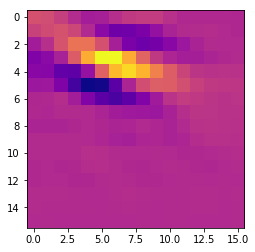

245


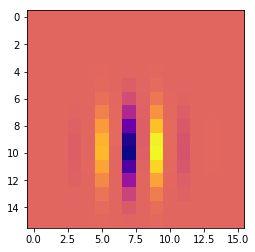

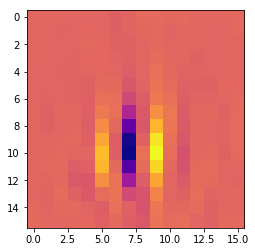

246


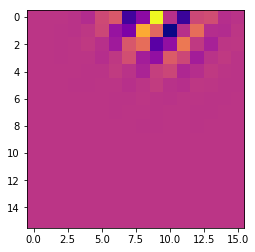

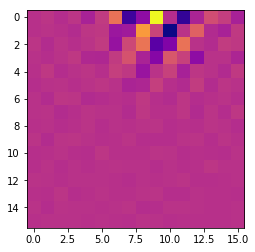

249


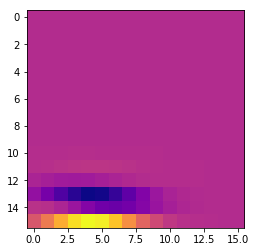

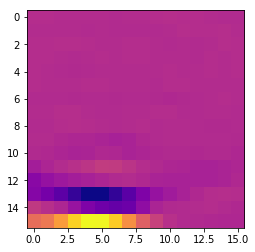

251


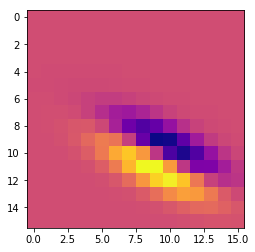

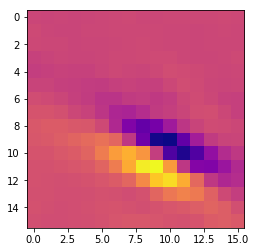

252


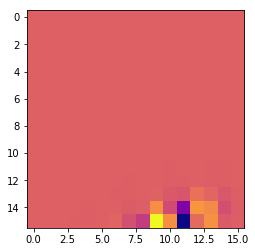

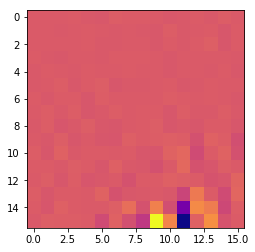

254


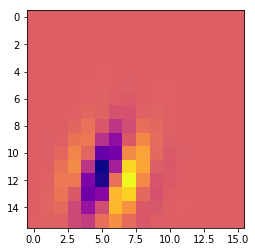

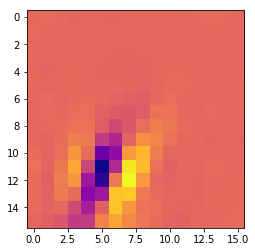

255


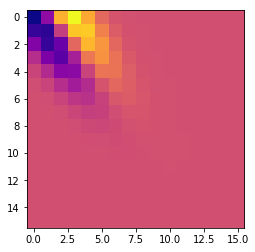

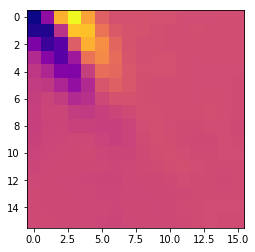

256


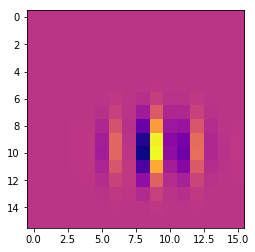

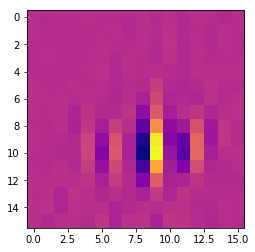

258


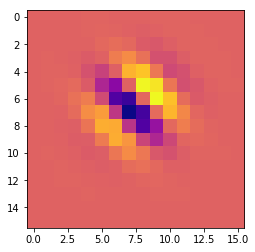

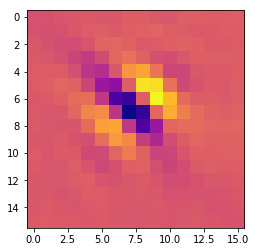

259


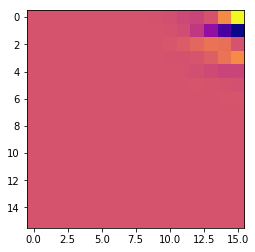

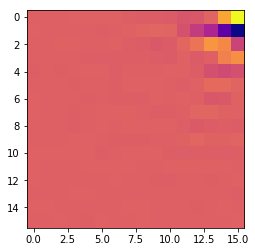

260


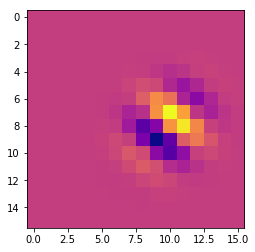

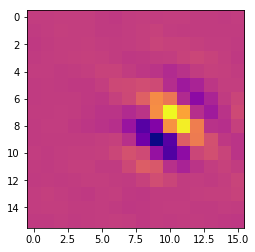

262


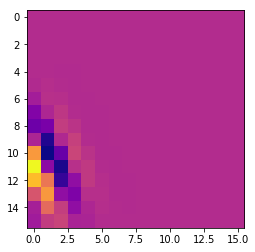

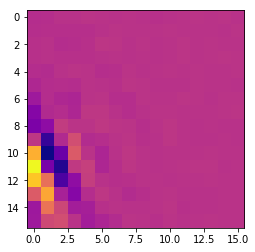

266


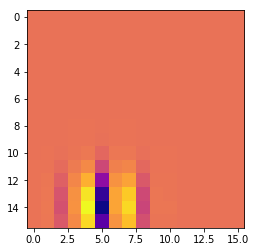

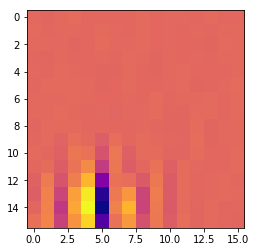

267


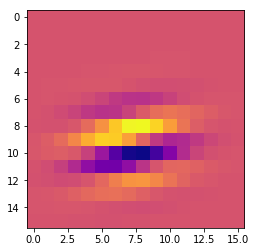

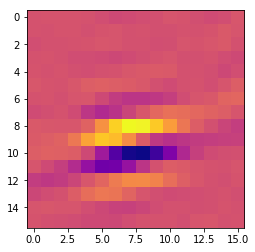

270


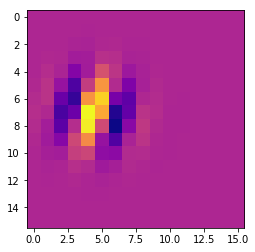

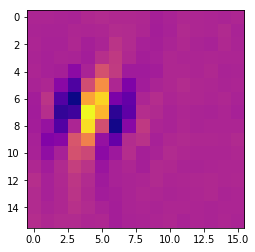

271


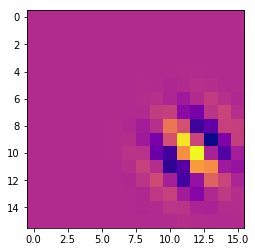

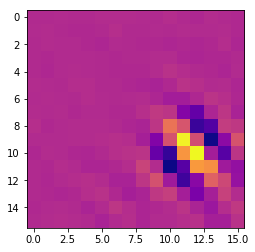

275


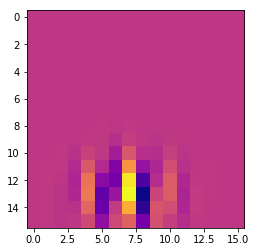

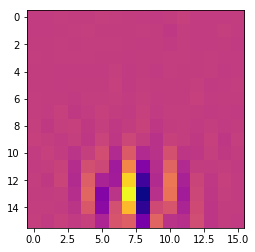

276


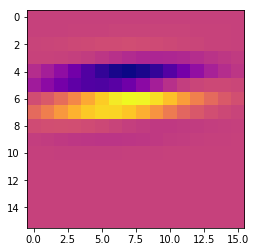

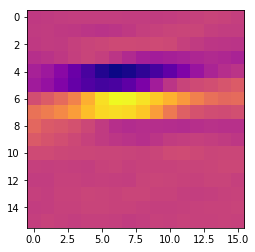

279


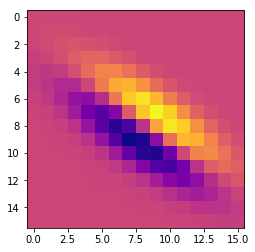

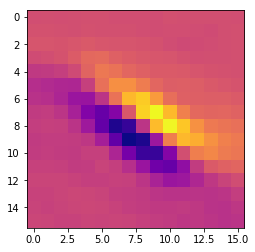

280


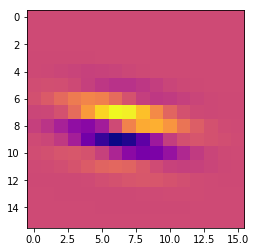

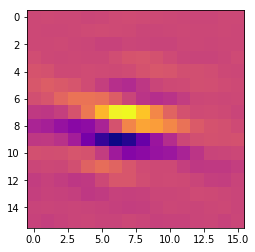

282


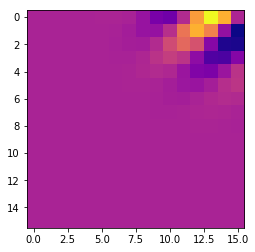

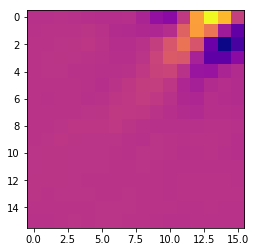

283


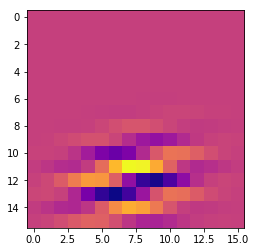

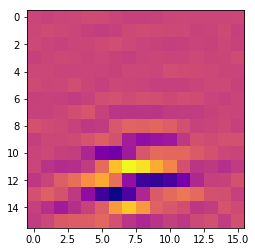

284


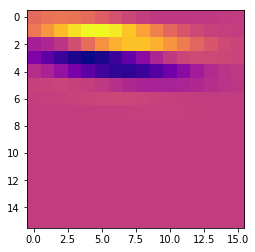

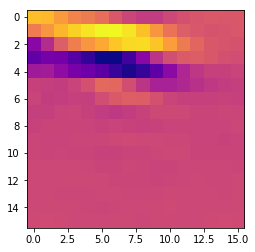

288


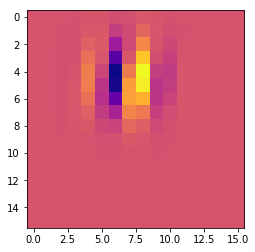

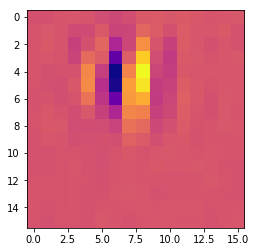

289


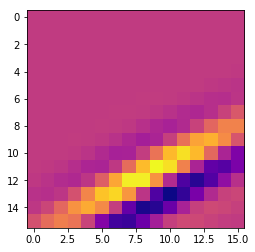

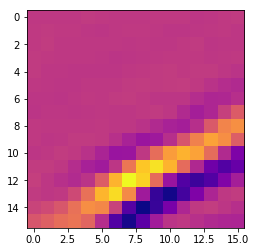

290


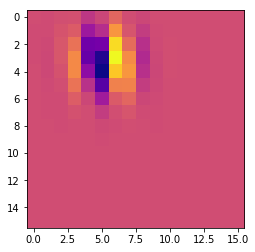

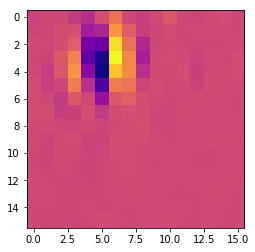

291


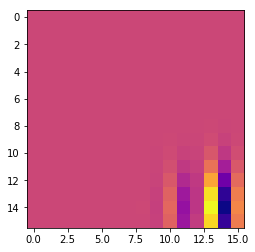

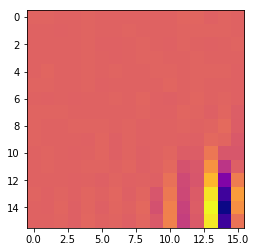

292


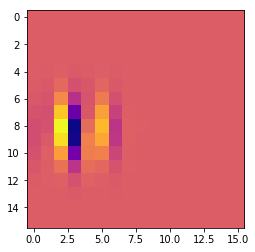

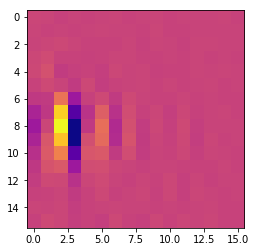

135


In [70]:
count = 0
for i in range(300):
    if gabor_fits[i,0] != 0.0:
        count += 1
        print(i)
        wave = []
        popt = gabor_fits[i,:]
        for q in xy:
            wave.append(gabor(q , popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6],popt[7]))
        plt.imshow(np.reshape(wave, (pixels, pixels)), cmap = 'plasma')
        plt.show()

        plt.imshow(np.reshape(bases[:,i], (pixels, pixels)), cmap = 'plasma')
        plt.show()
print(count)
        

In [65]:
for bad_fit in bad_fits:
    try:
        popt, pcov = curve_fit(gabor,xy.T, bases[:,i], max_nfev = 10000,p0 = (1,.5,.5,1,0,1,3,15), bounds = ([-1,-1,-1,-3,-3,0,0,0], [1,1,1,3.15,3.15,5,5,30]))
        
        wave = []
        for q in xy:
            wave.append(gabor(q , popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6],popt[7]))
        energy = np.sum((bases[:,bad_fit] - wave)**2)
        if energy > 0.1:
            print(bad_fit)
        else:
            gabor_fits[bad_fit,:] = popt
        #plt.imshow(np.reshape(wave, (pixels, pixels)), cmap = 'plasma')
        #plt.show()

        #plt.imshow(np.reshape(bases[:,i], (pixels, pixels)), cmap = 'plasma')
        #plt.show()
    
    except RuntimeError:
        print('failed fit')
        print(bad_fit)

1
3
4
6
8
10


In [67]:
print(gabor_fits)

[[-0.437 0.144 0.128 ..., 0.217 0.153 12.511]
 [0.000 0.000 0.000 ..., 0.000 0.000 0.000]
 [0.419 -0.183 -0.263 ..., 0.377 0.142 7.238]
 ..., 
 [0.000 0.000 0.000 ..., 0.000 0.000 0.000]
 [0.000 0.000 0.000 ..., 0.000 0.000 0.000]
 [0.000 0.000 0.000 ..., 0.000 0.000 0.000]]


285
5
7


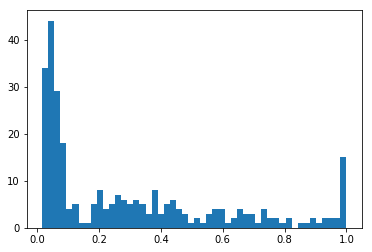

In [71]:
print(len(energies))
for i in range(9):
    if energies[i]>0.5:
        print(i)
plt.hist(energies, 50)
plt.show()

## Load natural images

In [171]:
IMAGES = scipy.io.loadmat('IMAGES.mat')
IMAGES = IMAGES['IMAGES']
(imsize, imsize, num_images) = np.shape(IMAGES)

## Randomly select image patches

In [172]:
def sample_images(sample_size, IMAGES):
    border = 4  #buffer around the edge of an entire image
    #imi = np.ceil(num_images * random.uniform(0, 1))  #pick a random image
    I = np.zeros((pixels**2,sample_size))

    for i in range(sample_size):
        r = border + np.ceil((imsize-pixels-2*border) * random.uniform(0, 1))
        c = border + np.ceil((imsize-pixels-2*border) * random.uniform(0, 1))
        image = IMAGES[int(r):int(r+pixels), int(c):int(c+pixels), int(np.ceil(num_images * random.uniform(0, 1))-1)]
        I[:,i] = np.reshape(image, pixels**2) 
        
    return I

In [173]:
I = sample_images(10000, IMAGES)

## Find coefficients of sparse representation

In [174]:
ahat = fista.fista(I, bases, lambdav = 0.01, max_iterations=50)

In [7]:
ahat_list = np.zeros([100, ahat.shape[0], ahat.shape[1]])

## Compute correlations between neuron pairs; plot as histogram

In [169]:
corr_list = []
neuron_pairs = combinations(range(300),2)

for i,j in neuron_pairs:
    corr = np.corrcoef(ahat[i,:], ahat[j,:])[0, 1]
    corr_list.append(corr)
    if abs(corr) > 0.4 and i != j:
        print(i,j)

75 174


In [88]:
distances = []
neuron_pairs = combinations(range(300),2)
for i,j in neuron_pairs:
    x1, y1 = gabor_fits[i,1], gabor_fits[i,2]
    x2, y2 = gabor_fits[j,1], gabor_fits[j,2]
    if x1 != 0.0:
        dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    else:
        dist = -0.1
    distances.append(dist)
    

In [149]:
kdistances = []
neuron_pairs = combinations(range(300),2)
for i,j in neuron_pairs:
    k1 = gabor_fits[i,7]
    k2 = gabor_fits[j,7]
    if k1 != 0.0:
        dist = np.abs(k1 - k2)
    else:
        dist = -0.1
    kdistances.append(dist)
    

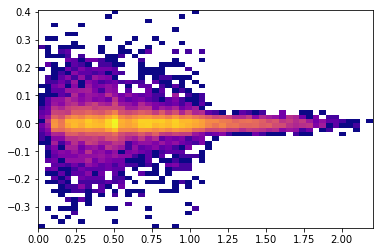

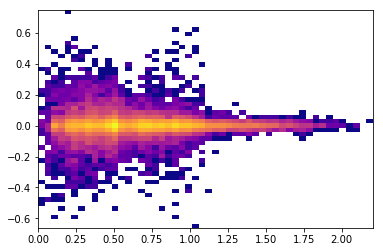

In [152]:
#plt.scatter(distances, corr_list)
distances2 = []
corr_list2 = []
avg_noise_corr_list2 = []
for i in range(44850):
    if distances[i] >= 0:
        distances2.append(distances[i])
        corr_list2.append(corr_list[i])
        avg_noise_corr_list2.append(avg_noise_corr_list[i])

plt.hist2d(distances2, corr_list2,(50,50), cmap = 'plasma', norm = LogNorm())
plt.show()

plt.hist2d(distances2, avg_noise_corr_list2,(50,50), cmap = 'plasma', norm = LogNorm())
plt.show()

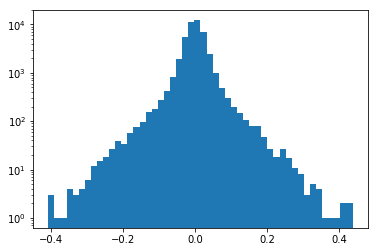

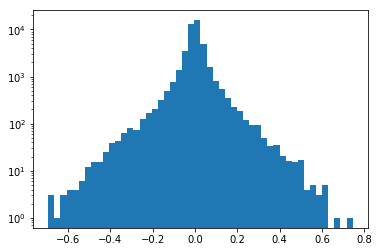

In [23]:
corr_hist = plt.hist(corr_list,50, log = True)
plt.show()

plt.hist(avg_noise_corr_list,50, log = True)
plt.show()

0.382198730186


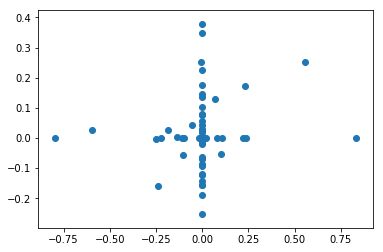

In [92]:
plt.scatter(ahat[56,:], ahat[148,:])
print(np.corrcoef(ahat[58,:], ahat[148,:])[0, 1])
plt.show()

In [12]:
def find_strong_image(neuron1, neuron2):
    for i in range(len(ahat[90,:])):
        if abs(ahat[neuron1,:][i]) > 0.1 and abs(ahat[neuron2,:][i]) > 0.1:
            return(i)
        
def find_strong_images(neuron1, neuron2, cutoff = 0.05):
    image_nums = []
    for i in range(len(ahat[90,:])):
        if abs(ahat[neuron1,:][i]) > cutoff and abs(ahat[neuron2,:][i]) > cutoff:
            image_nums.append(i)
    if len(image_nums) == 0:
        image_nums = find_strong_images(neuron1,neuron2, cutoff = cutoff - 0.05)
    return(image_nums)

In [13]:
print(find_strong_images(58,148))

[3, 5, 41, 96, 118, 124, 134, 143, 145, 166, 192, 200, 221, 252, 267, 273, 276, 300, 311, 336, 351, 401, 406, 417, 423, 449, 512, 517, 528, 543, 549, 597, 605, 607, 624, 638, 662, 667, 677, 686, 693, 699, 728, 753, 754, 758, 771, 774, 777, 782, 801, 802, 815, 818, 843, 855, 860, 861, 869, 917, 926, 927, 929, 936, 955, 956, 958, 964, 979, 983, 990, 994]


In [14]:
def add_noise(image, sigma = 1e-2):
    noise = np.random.normal(0.0, sigma, image.shape)
    return image + noise

def plot_neurons(i,j, responses):
    neuron1 = responses[i,:]
    neuron2 = responses[j,:]
    print(np.corrcoef(neuron1,neuron2)[0, 1])
    plt.scatter(neuron1, neuron2)
    plt.show()

In [23]:
def get_noisy_responses(image):
    for i in range(100):
        ahat_list[i] = fista.fista(add_noise(image, 1e-2), bases, lambdav = 0.1, max_iterations = 50)
    """responses = np.zeros((bases.shape[1], num_trials))
    image_num = find_strong_image(neuron1, neuron2)  
    selected_image = np.reshape(I[:,image_num], (256,1))

    for i in range(num_trials):
        ahat2 = fista.fista(add_noise(selected_image, 1e-2), bases, lambdav = 0.1, max_iterations = 50)
        responses[:, i] = ahat2[:, 0]
        
    corr = np.corrcoef(responses[neuron1,:], responses[neuron2,:])[0, 1]
    
    return(corr)"""
    
def get_noise_correlations(neuron1, neuron2):
    corr = 0
    image_nums = find_strong_images(neuron1, neuron2)
    for image_num in image_nums:
        corr += np.corrcoef(ahat_list[:,neuron1,image_num], ahat_list[:,neuron2,image_num])[0, 1]
    return(corr/len(image_nums))
    

In [16]:
get_noisy_responses(I)

In [17]:
noise_corr_list = []

for neuron1, neuron2 in combinations(range(300),2):
    corr = get_noise_correlations(neuron1, neuron2)
    noise_corr_list.append(corr)

In [129]:
def plot_correlations(noise_corr):
    
    fig, ax = plt.subplots(figsize = (8,5))
    h = ax.hist2d(noise_corr, corr_list,(50,50), cmap = 'plasma', norm = LogNorm())
    m,b = np.polyfit(noise_corr, corr_list, 1)
    ax.plot([-1.0, 1.0], [-m + b, m + b], color='k', linestyle='-', linewidth=2)
    s = 'y = {0:1.2E}x + {1:1.2E}'.format(m,b)
    ax.text(0.05, 0.53, s, fontsize=12)
    plt.xlabel('noise correlation')
    plt.ylabel('signal correlation')
    ax.set_aspect('equal')
    plt.colorbar(h[3])

    #plt.savefig('foo2.png', bbox_inches='tight')
    plt.show()

"""plt.scatter(noise_corr_list, corr_list)
plt.axis('equal')
plt.show()"""

"plt.scatter(noise_corr_list, corr_list)\nplt.axis('equal')\nplt.show()"

In [128]:
print(len(noise_corr_list[1]))
noise_corr_list2 = np.asarray(noise_corr_list)
print(noise_corr_list2[0][:,0])
print(len(corr_list))

44850
[0.006 -0.072 -0.038 ..., 0.067 0.028 -0.096]
44850


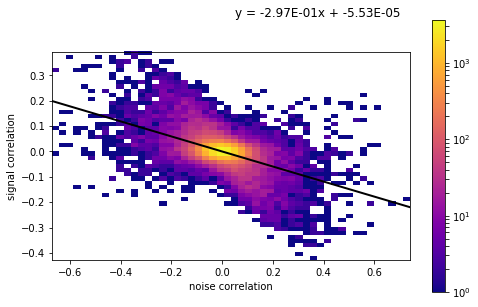

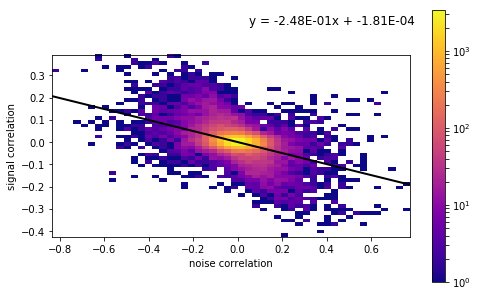

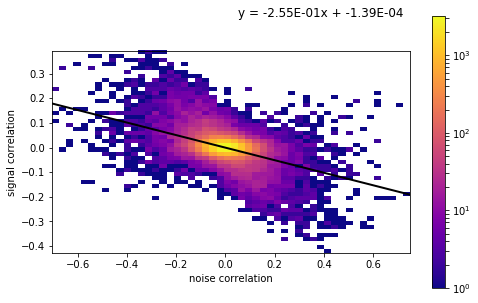

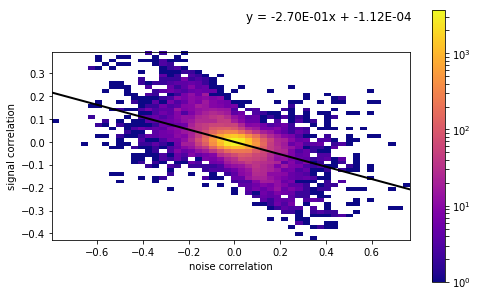

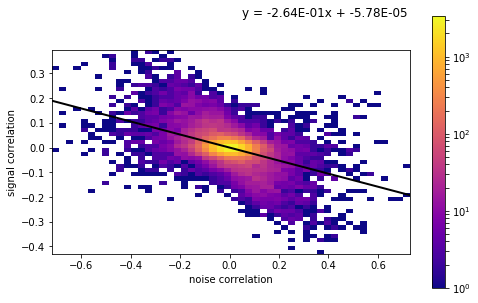

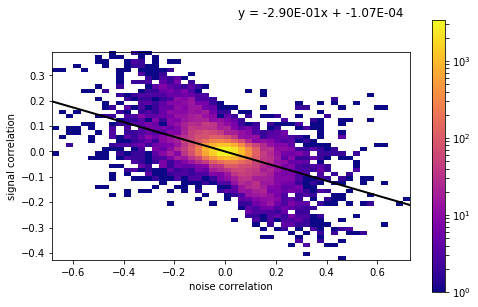

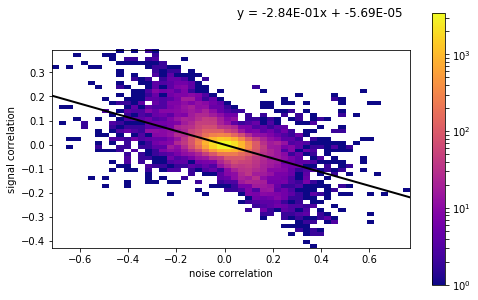

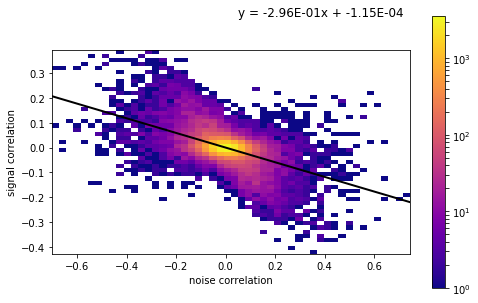

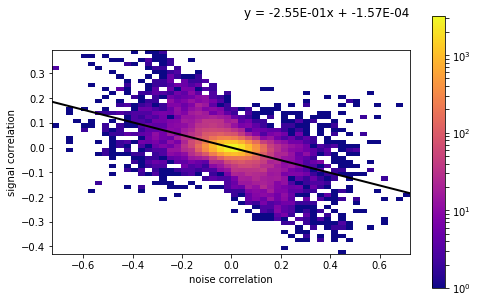

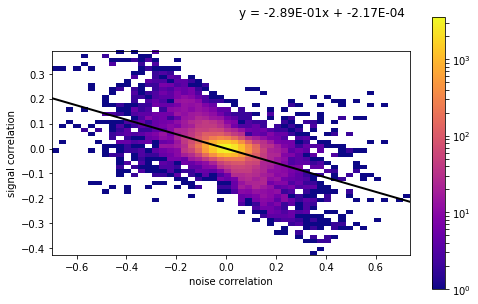

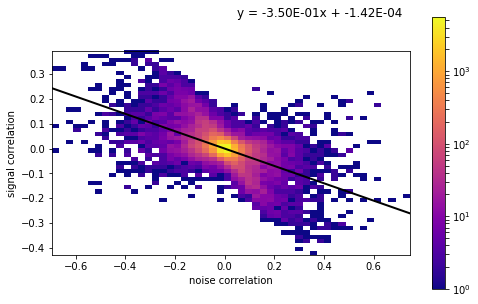

In [175]:
avg_noise_corr_list = np.zeros(44850)
for i in range(10):
    plot_correlations(noise_corr_list2[i][:,0])
    avg_noise_corr_list += (np.asarray(noise_corr_list2[i][:,0]))/10.
#plot_correlations(noise_corr_list)
#plot_correlations(noise_corr_listA)
#plot_correlations(noise_corr_listB)
#avg_noise_corr_list = (np.asarray(noise_corr_list) + np.asarray(noise_corr_listA) + np.asarray(noise_corr_listB))/3
plot_correlations(avg_noise_corr_list)

In [202]:
#I = sample_images(1, IMAGES)
ahat = fista.fista(I, bases, lambdav = 0.01, max_iterations=5000)
#ahat = np.random.normal(0.0, 1e-2, size = ahat.shape)
print(U(ahat))
print(I.shape)

0.0494510387522
(256, 1)


In [252]:
#print(0.01*np.sum(np.log(1 + ahat**2)))

grad = 0
for i in range(256):
    im = I[i]
    reco = bases.dot(ahat)[i]
    grad += 2*(im - reco)*(-bases[i,6])
    
print(grad)

#print(bases.shape)
print(np.sum((I - bases.dot(ahat))*(-2*bases), axis = 0))
    

#print(np.sum(np.abs(I-bases.dot(ahat))))

[-0.010]
[0.010 0.007 0.000 0.007 -0.000 -0.010 -0.010 0.005 -0.010 0.008 -0.004
 -0.000 -0.009 0.010 -0.010 -0.010 0.010 0.001 0.003 -0.002 0.010 0.005
 -0.010 -0.000 -0.000 -0.008 0.010 -0.002 -0.003 0.010 0.001 -0.010 0.010
 0.010 -0.010 0.010 0.004 -0.005 -0.010 -0.010 0.010 0.010 -0.010 0.010
 0.010 -0.010 -0.010 0.000 0.010 0.006 -0.005 0.010 -0.010 -0.010 0.010
 -0.010 -0.007 0.008 0.010 -0.010 -0.009 -0.000 -0.006 0.003 -0.009 0.010
 -0.010 0.010 0.010 0.010 -0.003 0.010 -0.010 -0.010 -0.010 -0.004 0.010
 0.010 0.008 0.010 -0.010 0.010 -0.008 -0.010 -0.005 -0.010 -0.002 0.010
 -0.003 -0.002 -0.010 0.010 -0.000 -0.010 -0.010 -0.010 0.010 -0.010 -0.010
 0.009 -0.010 -0.006 0.007 -0.003 -0.010 0.003 -0.010 -0.008 -0.010 -0.010
 0.003 0.010 0.007 0.010 0.010 0.010 0.010 0.010 0.001 -0.006 -0.010 0.010
 -0.006 -0.010 -0.010 0.010 -0.010 0.010 -0.010 0.010 -0.010 0.007 0.010
 0.010 0.009 0.010 -0.010 -0.010 -0.010 0.007 0.001 0.008 0.005 0.010
 -0.010 0.010 0.010 0.010 -0.010 0.010 -

# HMC algorithm

In [90]:
def U(q, Phi = bases, lambdav = 0.01):
    
    return np.sum((I-Phi.dot(q))**2) + lambdav*np.sum(np.log(1 + q**2))

def grad_U(q, Phi = bases, lambdav = 0.01):
    
    grad = np.zeros(q.shape)
    reco_grad = np.sum((I - bases.dot(q))*(-2*bases), axis = 0)
    
    for i in range(300):
        grad[i,:] =  lambdav*2*q[i]/(1 + q[i]**2) + reco_grad[i]

    return(grad)

In [91]:
def HMC(epsilon, L, current_q):
    q = current_q
    p = 1e-2*np.random.normal(size = q.shape)
    current_p = p
    
    # Make a half step for momentum
    
    p += -epsilon*grad_U(q)/2
    
    # Alternate full steps for position and momentum
    
    for i in range(L):
        
        # Make a full step for the position
        
        q += epsilon*p
        
        # Make a full step for momentum, except at end of trajectory
        
        if i != L-1:
            
            p += -epsilon*grad_U(q)
            
    # Make a half step for momentum at the end
    
    p += -epsilon*grad_U(q)/2
    
    
    current_U = U(current_q)
    current_K = np.sum(current_p**2) / 2
    proposed_U = U(q)
    proposed_K = np.sum(p**2) / 2
    
    # Accept or reject the state at end of trajectory, returning either
    # the position at the end of the trajectory or the initial position
    #print(np.exp(current_U-proposed_U+current_K-proposed_K))

    if (np.random.uniform() < np.exp(current_U-proposed_U+current_K-proposed_K)):
        
        return q #accept
    
    else:
        return current_q # reject


In [196]:
sample=ahat
samplelist10 = np.zeros([100,300,1])
print(U(sample, bases, 0.01))
energies = []

4.62338490877


In [205]:
for i in range(500):
    
    if i % 20 ==0:
        print(U(sample, bases, 0.01))
    #samplelist[i,:,:] = sample
    #energies.append(U(sample, bases, 0.01))
    sample = HMC(0.1,25, sample)
   

0.094395242937
0.0914186884719
0.0950989829546
0.090886317701
0.0907847270519
0.0879836746189
0.0892740250597
0.0885676523062
0.0855448301445
0.084472607794
0.0827417279525
0.0827019523401
0.0837625609283
0.0815229430289
0.0809692450673
0.0840406591862
0.0833611301808
0.0819441374444
0.0790627748989
0.0790037862104
0.0789758386386
0.0828137803584
0.0792089848564
0.0752877049618
0.0762266537837


In [92]:
BRC_samplesA = np.load('samplesA.npy')
print(BRC_samplesA.shape)

IA = np.load('selected_imageA.npy')

BRC_samplesB = np.load('samplesB.npy')
print(BRC_samplesB.shape)

IB = np.load('selected_imageB.npy')

sample_list = []
image_list = []
for i in range(10):
    sample_list.append(np.load('sample_list%d.npy' % i))
    image_list.append(np.load('selected_image%d.npy' % i))

print(sample_list[0].shape)

(10000, 300, 1)
(10000, 300, 1)
(10000, 300, 1)


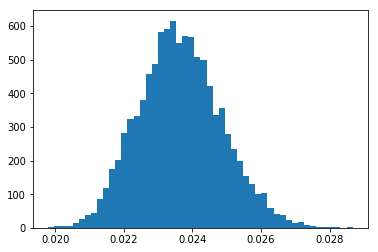

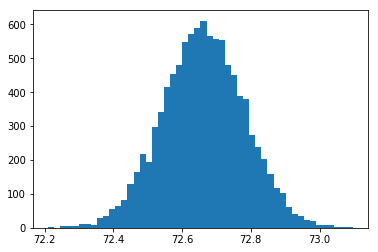

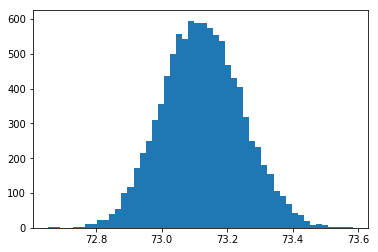

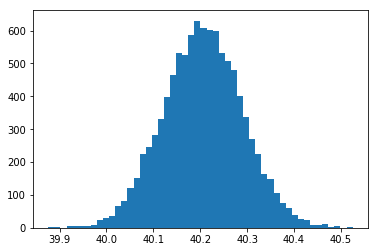

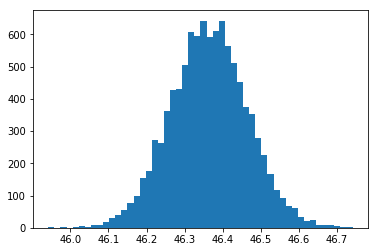

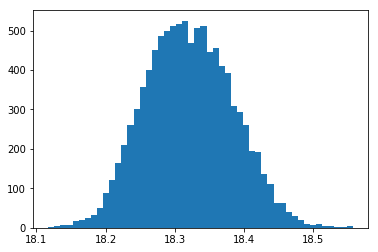

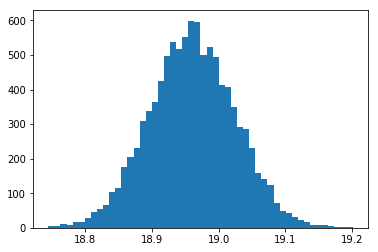

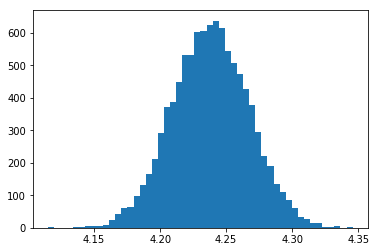

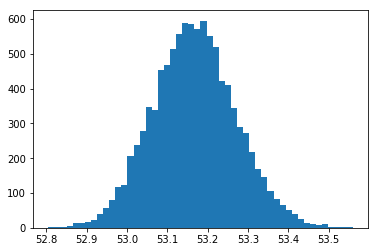

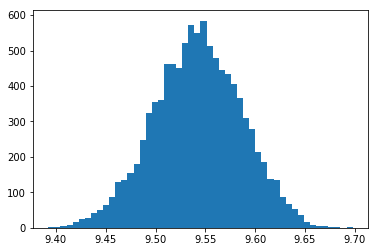

In [28]:
"""I = IA
energies = []
for i in range(10000):
    energies.append(U(BRC_samplesA[i,:,:], bases, 0.01))

plt.hist(energies,bins=50)
plt.show()

I = IB
energies = []
for i in range(10000):
    energies.append(U(BRC_samplesB[i,:,:], bases, 0.01))

plt.hist(energies,bins=50)
plt.show()"""

for i in range(10):
    energies = []
    for j in range(10000):
        energies.append(U(sample_list[i][j,:,:], bases, 0.01))

    plt.hist(energies,bins=50)
    plt.show()

0.00600115296947
0.00689916869931
0.00542935740186
0.00696294689429
0.00277752755468
0.00836342541139
0.0108447093726
0.00729508950663
0.00678732111972
0.0067489751068
[[0.006]
 [0.007]
 [0.005]
 [0.007]
 [0.003]
 [0.008]
 [0.011]
 [0.007]
 [0.007]
 [0.007]]


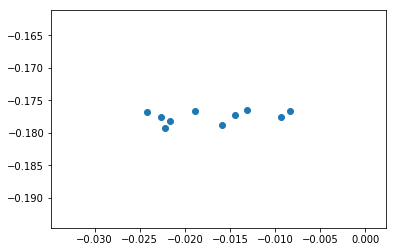

In [71]:
for j in samplelist:
    print(j[1][0])

print(samplelist[:,1,:])
plt.scatter(samplelist[:,4,:],samplelist[:,5,:])
plt.show()

In [112]:
def get_noise_correlations(neuron1, neuron2, noisy_responses):
    #plt.scatter(noisy_responses[:,neuron1,0],noisy_responses[:,neuron2,0])
    #plt.show()
    corr = np.corrcoef(noisy_responses[:,neuron1,0],noisy_responses[:,neuron2,0])[0, 1]
    if abs(corr) > 1.0:
        print(neuron1, neuron2)
    return(corr)#, np.average(noisy_responses[:,neuron1,0]), np.average(noisy_responses[:,neuron2,0]))
    

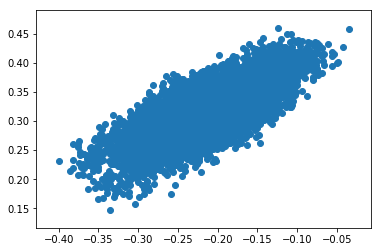

288 290


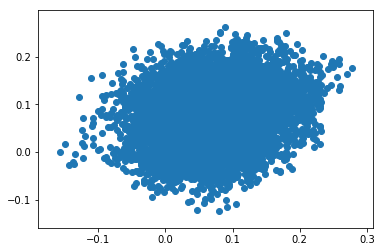

(0.21677313072825483, 0.069154478069294575, 0.07407222539325789)

In [72]:
#get_noise_correlations(125,269,BRC_samples)

#for i in range(10):
#    get_noise_correlations(125,269,sample_list[i])
    
get_noise_correlations(288,290,BRC_samplesA)
get_noise_correlations(1,6,BRC_samplesB)


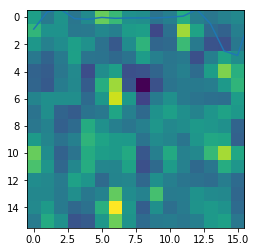

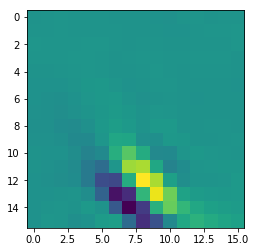

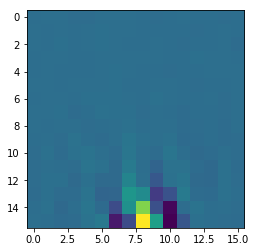

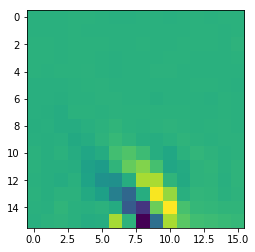

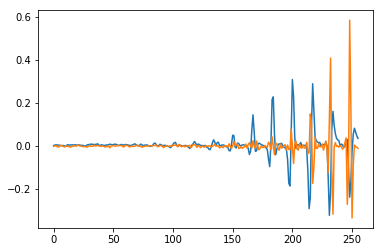

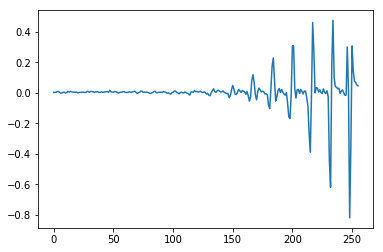

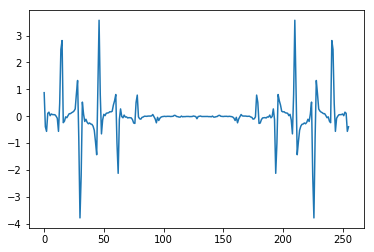

In [89]:
pixels = 16
plt.imshow(np.reshape(image_list[0][:,0], (pixels, pixels)))
plt.show()
plt.imshow(np.reshape(bases[:,5], (pixels, pixels)))
plt.show()
plt.imshow(np.reshape(bases[:,135], (pixels, pixels)))

plt.show()
plt.imshow(np.reshape(bases[:,5] - bases[:,135], (pixels, pixels)))
#plt.imshow(np.reshape(add_noise(I[:,1894], 0.1), (pixels,pixels)))
plt.show()

plt.plot(bases[:,5])
plt.plot(bases[:,135])
plt.show()

plt.plot(bases[:,5] - bases[:,135])
plt.show()

sp = np.fft.fft(bases[:,5])

plt.plot(sp.real)
plt.show()


In [98]:
noise_corr_list = []
for i in range(10):
    temp_list = []
    for neuron1, neuron2 in combinations(range(300),2):
        corr = get_noise_correlations(neuron1, neuron2, sample_list[i])
        temp_list.append(corr)
    noise_corr_list.append(temp_list)

17 40
22 149
24 126
54 232
57 125
58 250
66 196
79 87
163 234
196 224
198 295
288 290
10 234
17 40
18 114
22 149
24 126
40 273
54 232
57 125
57 269
58 250
61 190
64 290
66 196
66 296
79 87
79 269
86 180
86 248
104 262
109 168
122 252
125 259
125 269
148 197
163 234
180 248
196 224
196 296
198 295
288 290
8 274
10 234
17 40
22 149
24 126
54 232
57 125
57 269
58 250
66 196
67 81
73 294
77 161
79 87
79 269
81 203
83 229
96 274
104 262
125 259
125 269
148 197
151 213
163 234
175 266
198 295
233 274
288 290
3 42
10 234
17 40
19 52
22 149
24 68
24 126
42 228
52 60
54 232
57 125
79 87
109 168
148 197
163 234
175 266
198 295
288 290
8 274
10 234
17 40
24 126
54 232
57 125
57 269
58 250
66 196
96 274
104 262
125 269
148 197
175 266
233 274
288 290
10 234
17 40
22 149
24 126
54 232
57 125
58 250
66 196
73 255
79 87
109 168
122 252
125 269
198 295
288 290
17 40
19 52
22 149
24 126
54 232
57 125
58 250
66 196
79 87
90 173
104 262
122 252
125 269
148 197
163 234
198 295
288 290
10 234
17 40
24 126


In [41]:
corr_response_list = []
for neuron1, neuron2, in combinations(range(300),2):
    corr_response_list.append(get_noise_correlations(neuron1, neuron2, sample_list[0]))

4 264
5 135
8 62
8 274
10 234
12 38
13 65
14 195
17 40
18 114
19 52
21 46
21 282
22 78
22 149
22 191
24 68
24 126
25 153
27 90
29 258
31 35
31 230
34 200
34 229
36 170
36 242
37 253
38 132
39 54
39 131
39 232
40 273
42 228
42 239
43 264
45 170
48 50
48 188
48 277
50 263
51 264
51 278
52 60
53 227
54 131
54 219
54 232
54 272
56 76
57 79
57 93
57 125
57 269
58 148
58 226
58 250
58 299
59 63
61 190
63 74
63 252
64 290
65 93
66 196
66 296
67 81
67 148
67 197
67 278
68 126
68 262
69 136
69 214
71 130
72 229
73 255
73 294
74 117
74 190
74 221
77 161
78 223
78 237
79 87
79 269
81 203
82 84
82 146
82 185
82 275
83 199
83 229
83 231
83 263
86 248
89 124
90 173
92 109
93 125
93 269
94 116
94 125
94 183
94 268
95 280
96 274
96 296
97 179
101 115
104 211
104 228
104 262
105 213
108 256
109 168
110 222
111 184
112 232
114 136
114 153
115 230
117 139
117 287
119 222
121 138
122 135
122 252
122 271
125 183
125 259
125 269
130 170
130 297
131 201
135 155
135 252
135 275
143 195
146 185
146 285
148 197

(3,)


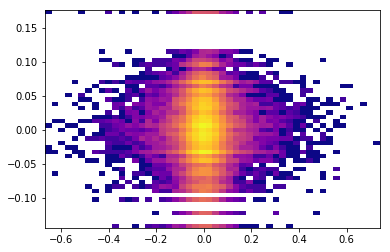

In [61]:
corr_response_arr = np.asarray(corr_response_list)
print(corr_response_arr[0,:].shape)
plt.hist2d(corr_response_arr[:,0], corr_response_arr[:,2],(50,50), cmap = 'plasma', norm = LogNorm())
#plt.scatter(corr_response_arr[:,0], corr_response_arr[:,1])
plt.show()


In [194]:
def fancy_scatter(x,y):    
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=50, edgecolor='')
    plt.show()

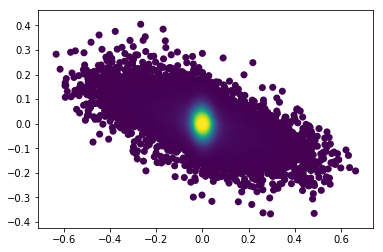

In [202]:
x = np.array(noise_corr_list)
y = np.array(corr_list)
fancy_scatter(x,y)

[-0.111 -0.132 -0.157 -0.112 -0.127 -0.139 -0.158 -0.179 -0.111 -0.150
 -0.164 -0.145 -0.155 -0.171 -0.147 -0.149 -0.149 -0.155 -0.159 -0.151
 -0.154 -0.141 -0.133 -0.127 -0.166 -0.147 -0.168 -0.152 -0.138 -0.127
 -0.166 -0.154 -0.153 -0.134 -0.139 -0.113 -0.120 -0.129 -0.156 -0.160
 -0.156 -0.168 -0.137 -0.148 -0.149 -0.153 -0.164 -0.148 -0.145 -0.153
 -0.156 -0.147 -0.129 -0.172 -0.145 -0.141 -0.138 -0.129 -0.124 -0.139
 -0.133 -0.179 -0.130 -0.134 -0.131 -0.110 -0.161 -0.133 -0.160 -0.146
 -0.140 -0.146 -0.128 -0.152 -0.103 -0.164 -0.143 -0.132 -0.129 -0.139
 -0.111 -0.140 -0.132 -0.121 -0.159 -0.149 -0.140 -0.134 -0.124 -0.114
 -0.130 -0.156 -0.175 -0.125 -0.150 -0.126 -0.126 -0.126 -0.158 -0.149]


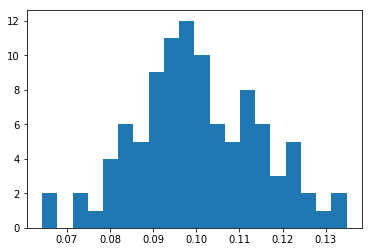

In [119]:
print(ahat_list[:,0,3])
plt.hist(ahat_list[:,0,8], 20)
plt.show()

-0.295571891613


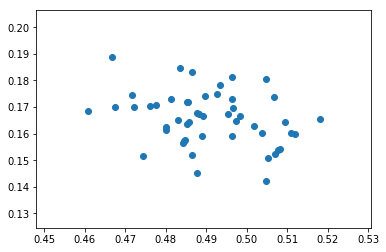

In [74]:
plot_neurons(58,148, responses)

# Signal correlation vs noise correlation

In [84]:
noise_corr_list = []

for neuron1, neuron2 in combinations(range(300),2):
    noise_corr_list.append(get_noise_correlation(neuron1, neuron2))
    

KeyboardInterrupt: 

In [ ]:
corr_hist = plt.hist(noise_corr_list,50)
plt.show()

## Extras

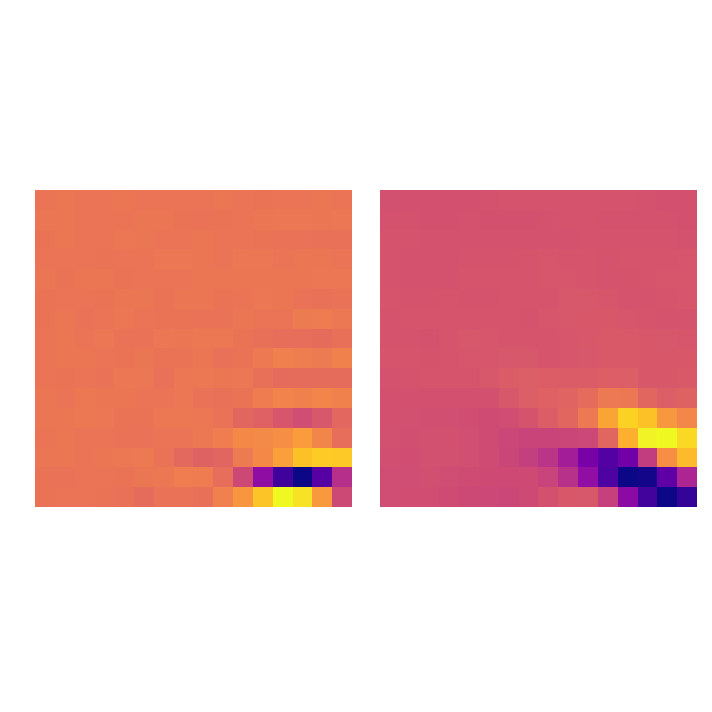

In [50]:
num_images = 15
pixels = 16

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,10), facecolor = 'white')

axes = axes.ravel()
j = 0
for i in [67,81]:      
    axes[j].imshow(np.reshape(bases[:,i], (pixels, pixels)), cmap = 'plasma')
    axes[j].axis('off')
    j += 1
    
plt.tight_layout(h_pad = 1, w_pad = 1)
plt.show()

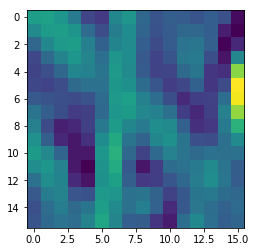

In [117]:
pixels = 16
plt.imshow(np.reshape(I[:,0], (pixels, pixels)))
#plt.imshow(np.reshape(add_noise(I[:,1894], 0.1), (pixels,pixels)))
plt.show()

0.111577397261


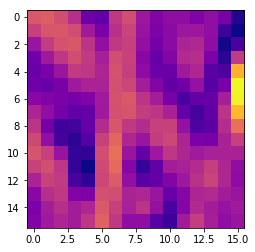

0.100234509818


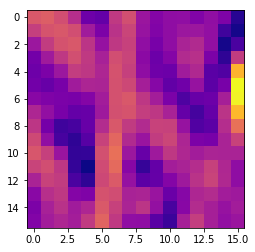

In [120]:


reco = np.dot(bases, ahat[:,0])
print(U(ahat))
plt.imshow(np.reshape(reco, (pixels,pixels)), cmap = 'plasma')
plt.show()

reco = np.dot(bases, BRC_samples[1000,:,:])
print(U(BRC_samples[0,:,:]))
plt.imshow(np.reshape(reco, (pixels,pixels)), cmap = 'plasma')
plt.show()

In [65]:
for i in range(100):
    print(energies[i], U(samplelist[i,:,:], bases, 0.01))
    
print(len(energies))
print(samplelist.shape)

0.238492400824 0.238492400824
0.238579461131 0.238579461131
0.239347658791 0.239347658791
0.238514043766 0.238514043766
0.239475659794 0.239475659794
0.239202585775 0.239202585775
0.23817538769 0.23817538769
0.238423059121 0.238423059121
0.238687390558 0.238687390558
0.238576534198 0.238576534198
0.239010493717 0.239010493717
0.239308027288 0.239308027288
0.238375580994 0.238375580994
0.237616362875 0.237616362875
0.238896214945 0.238896214945
0.237431992479 0.237431992479
0.238146348153 0.238146348153
0.237579887867 0.237579887867
0.238869298442 0.238869298442
0.239292312047 0.239292312047
0.238713403267 0.238713403267
0.238043226092 0.238043226092
0.239003588003 0.239003588003
0.239058048554 0.239058048554
0.238834791511 0.238834791511
0.239252163117 0.239252163117
0.239760454381 0.239760454381
0.240347659279 0.240347659279
0.239045069251 0.239045069251
0.237588911945 0.237588911945
0.237705192229 0.237705192229
0.238687049467 0.238687049467
0.237937885477 0.237937885477
0.2393181484

In [53]:
print(ahat.shape)

(300, 1000)


67
81
159
190
203
264


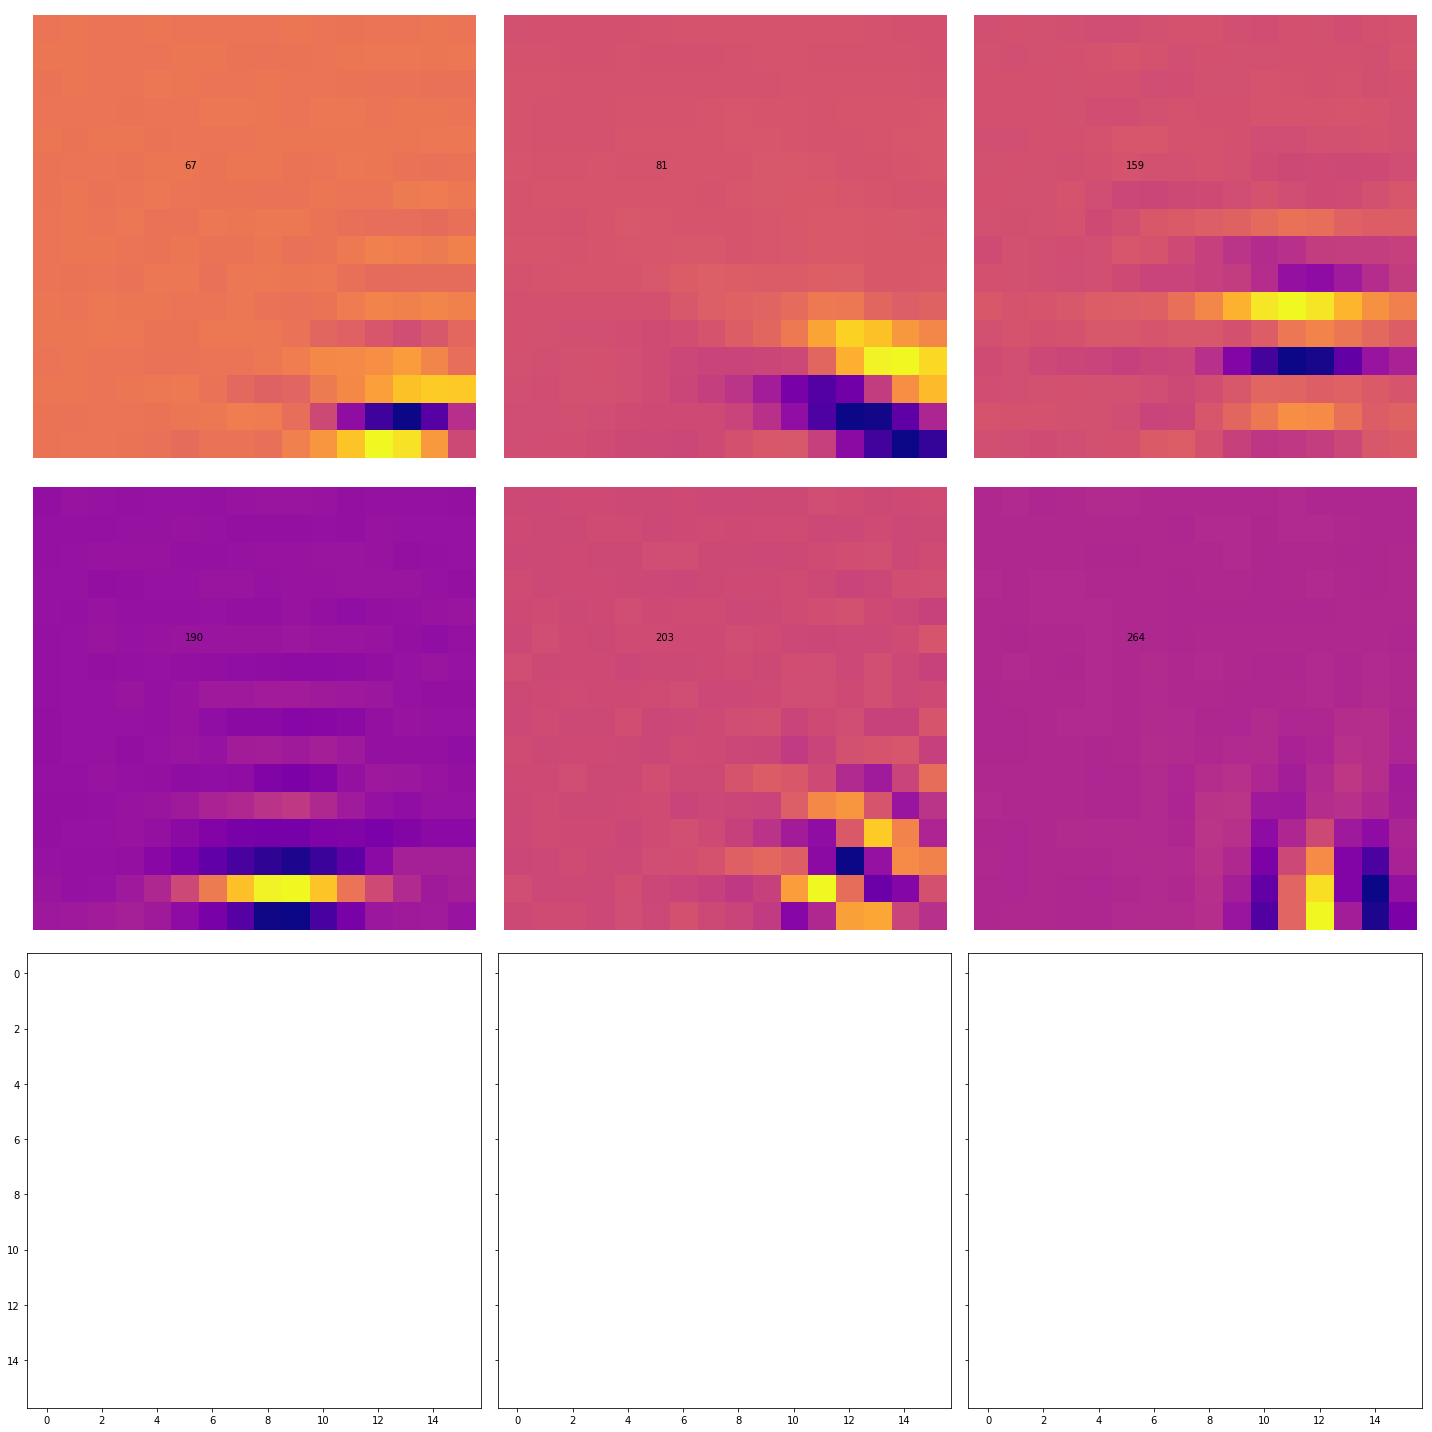

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize = (20,20), facecolor = 'white')
j = 0
partial_reco = np.zeros(256)
axes = axes.ravel()
for i in range(len(ahat)):  
    if abs(ahat[i,835]) > 0.3:
        print(i)
        #partial_reco += ahat[i]*bases[:,i]
        axes[j].imshow(np.reshape(bases[:,i], (pixels, pixels)), cmap = 'plasma')
        axes[j].text(5,5,str(i))
        axes[j].axis('off')
        j += 1
    
plt.tight_layout(h_pad = 1, w_pad = 1)
plt.show()

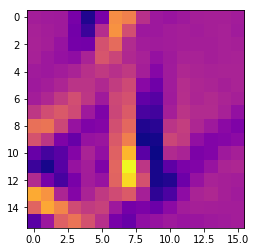

In [74]:
plt.imshow(np.reshape(partial_reco, (pixels, pixels)), cmap = 'plasma')
plt.show()

In [47]:
sums = []
thresh = np.arange(0,1,0.005)
for i in thresh:
    sums.append(np.sum(np.abs(ahat)>i))

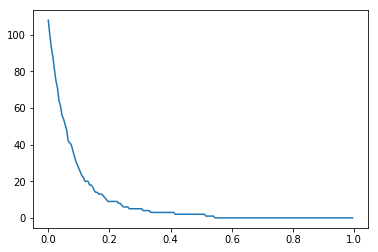

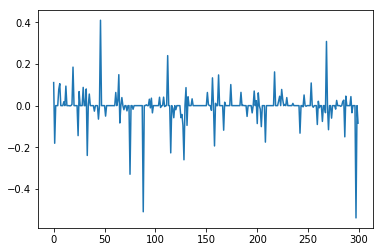

In [33]:
plt.plot(thresh, sums)
plt.show()
plt.plot(ahat)
plt.show()

In [81]:
x = range(10)
array = np.asarray(x)
np.save('arr_file.npy', array)

In [82]:
test = np.load('arr_file.npy')

In [83]:
print(test)

[0 1 2 3 4 5 6 7 8 9]


In [84]:
print(array)

[0 1 2 3 4 5 6 7 8 9]
